<a href="https://colab.research.google.com/github/ENKI0311/MIT-Data_Science_Coursework/blob/main/Shinkansen_Travel_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

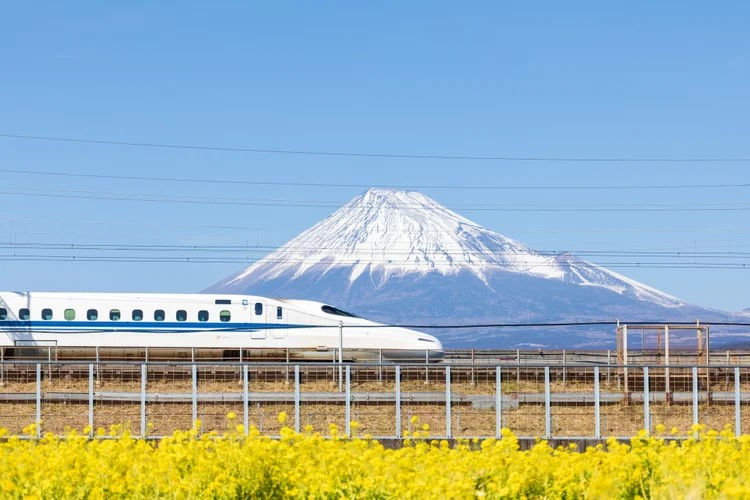


---

---



# **Shinkansen Travel Experience - Passenger Satisfaction Prediction**

### **Introduction**

This notebook aims to tackle the problem of predicting passenger satisfaction based on their overall experience traveling on the Shinkansen Bullet Train. The problem statement involves classifying whether a passenger was satisfied (`1`) or not satisfied (`0`) based on various attributes from two datasets: Travel Data and Survey Data.

### **Goal**

The primary goal is to build a robust machine learning model that accurately predicts the `Overall_Experience` of passengers using the Shinkansen Bullet Train. The model's performance will be evaluated based on its accuracy, as the competition requires the submission of a CSV file containing predictions for the test dataset.

### **Data Overview**

- **Travel Data**: Contains details related to passenger demographics and travel attributes specific to their Shinkansen journey.
- **Survey Data**: Aggregated data from post-service surveys, reflecting the passengers' overall experience.
- **Target Variable**: `Overall_Experience` (1 represents 'satisfied', and 0 represents 'not satisfied').

### **Notebook Structure**

1. **Data Loading and Exploration**: Import and explore the datasets to understand their structure, identify potential issues, and gain initial insights.
2. **Data Cleaning and Preprocessing**: Handle missing values, encode categorical variables, and engineer new features to enhance model performance.
3. **Exploratory Data Analysis (EDA)**: Conduct visual and statistical analysis to identify key patterns and relationships within the data.
4. **Modeling**: Develop and evaluate different machine learning models, starting with baseline models and progressing to more advanced techniques.
5. **Model Evaluation**: Use cross-validation and other evaluation metrics to assess model performance and fine-tune the models.
6. **Final Predictions**: Generate predictions on the test dataset and prepare the submission file.
7. **Conclusion**: Summarize key findings and suggest potential improvements or next steps.

### **Objective**

The objective is to achieve the highest possible accuracy in predicting passenger satisfaction, leveraging advanced feature engineering, model selection, and hyperparameter tuning. The notebook serves as a comprehensive end-to-end solution, showcasing the process of data exploration, model development, and performance optimization.

---

---



# Team AI Trailblazers

##By: John Chilton & Sushma Sharma

---



---



# Install Dependencies

In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 11.2 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 23.2 MB/s eta 0:00:00


In [ ]:
!pip install bayesian-optimization

## Load the Dependencies

In [ ]:
# Importing necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and utilities
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Handling warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Display settings for dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Datasets for training & test

## Train Dataset

In [ ]:
df_train_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Train_Dataset_Files/Surveydata_train_(2).csv')
df_train_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Train_Dataset_Files/Traveldata_train_(2).csv')

## Test dataset

In [ ]:
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Evaluation of each Dataset Exploration



*   Observations
*   Sanity Checks



## Checking the Head & Tail

##  Train dataset

In [ ]:
df_train_s.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_train_t.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


# Train tail dataset

In [ ]:
df_train_s.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [ ]:
df_train_t.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


## Test Dataset

## Test Head

In [ ]:
df_test_s.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
df_test_t.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


## Test Tail

In [ ]:
df_test_s.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [ ]:
df_test_t.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


# Describe the Data All

## Train Data

In [ ]:
df_train_s.describe(include='all')

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,9.437900e+04,94379.000000,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,NaN,NaN,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,NaN,NaN,Acceptable,Green Car,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,NaN,NaN,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533
mean,9.884719e+07,0.546658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.724501e+04,0.497821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.880000e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.882360e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.884719e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.887078e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train_t.describe(include='all')

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94302,85428,94346.000000,85153,94379,94379.000000,94322.000000,94022.000000
unique,NaN,2,2,NaN,2,2,NaN,NaN,NaN
top,NaN,Female,Loyal Customer,NaN,Business Travel,Eco,NaN,NaN,NaN
freq,NaN,47815,69823,NaN,58617,49342,NaN,NaN,NaN
mean,9.884719e+07,NaN,NaN,39.419647,NaN,NaN,1978.888185,14.647092,15.005222
std,2.724501e+04,NaN,NaN,15.116632,NaN,NaN,1027.961019,38.138781,38.439409
min,9.880000e+07,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,9.882360e+07,NaN,NaN,27.000000,NaN,NaN,1359.000000,0.000000,0.000000
50%,9.884719e+07,NaN,NaN,40.000000,NaN,NaN,1923.000000,0.000000,0.000000
75%,9.887078e+07,NaN,NaN,51.000000,NaN,NaN,2538.000000,12.000000,13.000000


## Test Data

In [ ]:
df_test_s.describe(include='all')

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,3.560200e+04,35580,35602,32277,32245,35590,35590,35594,35576,35584,32730,35577,35562,35580,35600,35600
unique,NaN,6,2,6,6,5,6,6,5,6,5,6,5,5,5,6
top,NaN,Acceptable,Ordinary,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,NaN,8003,17860,7361,7133,9364,8743,11436,11487,11025,10222,10842,13291,9982,13421,9680
mean,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.027756e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.990000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.990890e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.992670e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test_t.describe(include='all')

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,3.560200e+04,35572,32219,35591.000000,32154,35602,35602.000000,35573.000000,35479.000000
unique,NaN,2,2,NaN,2,2,NaN,NaN,NaN
top,NaN,Female,Loyal Customer,NaN,Business Travel,Eco,NaN,NaN,NaN
freq,NaN,18069,26349,NaN,22313,18473,NaN,NaN,NaN
mean,9.991780e+07,NaN,NaN,39.446995,NaN,NaN,1987.151761,14.880696,15.308802
std,1.027756e+04,NaN,NaN,15.137554,NaN,NaN,1024.308863,37.895453,38.531293
min,9.990000e+07,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,9.990890e+07,NaN,NaN,27.000000,NaN,NaN,1360.000000,0.000000,0.000000
50%,9.991780e+07,NaN,NaN,40.000000,NaN,NaN,1929.000000,0.000000,0.000000
75%,9.992670e+07,NaN,NaN,51.000000,NaN,NaN,2559.000000,13.000000,13.000000


## Shape of the Datasets

## Train Dataset

In [ ]:
df_train_s.shape

(94379, 17)

In [ ]:
df_train_t.shape

(94379, 9)

## Test dataset

In [ ]:
df_test_s.shape

(35602, 16)

In [ ]:
df_test_t.shape

(35602, 9)

## Looking for Missing Values

## Train Dataset

In [ ]:
df_train_s.isnull().sum()

,0
ID,0
Overall_Experience,0
Seat_Comfort,61
Seat_Class,0
Arrival_Time_Convenient,8930
Catering,8741
Platform_Location,30
Onboard_Wifi_Service,30
Onboard_Entertainment,18
Online_Support,91


In [ ]:
df_train_t.isnull().sum()

,0
ID,0
Gender,77
Customer_Type,8951
Age,33
Type_Travel,9226
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,57
Arrival_Delay_in_Mins,357


## Test Datasets

In [ ]:
df_test_s.isnull().sum()

,0
ID,0
Seat_Comfort,22
Seat_Class,0
Arrival_Time_Convenient,3325
Catering,3357
Platform_Location,12
Onboard_Wifi_Service,12
Onboard_Entertainment,8
Online_Support,26
Ease_of_Online_Booking,18


In [ ]:
df_test_t.isnull().sum()

,0
ID,0
Gender,30
Customer_Type,3383
Age,11
Type_Travel,3448
Travel_Class,0
Travel_Distance,0
Departure_Delay_in_Mins,29
Arrival_Delay_in_Mins,123


## Checking for Duplications

## Train Dataset

In [ ]:
df_train_s.duplicated().sum()

0

In [ ]:
df_train_t.duplicated().sum()

0

## Test Dataset

In [ ]:
df_test_s.duplicated().sum()

0

In [ ]:
df_test_t.duplicated().sum()

0

# Checking Missing values at the Columns

In [ ]:
df_train_s['ID'].duplicated().sum() # Checking the ID column on Survey

0

In [ ]:
df_train_t['ID'].duplicated().sum() # Checking the ID column on Travel Exp

0

In [ ]:
df_train_s['Overall_Experience'].duplicated().sum() # Checking the Overall Experience column on Survey

94377

In [ ]:
df_train_s['Baggage_Handling'].duplicated().sum() # Checking the Baggage Handling column on Survey

94373

In [ ]:
df_train_s['CheckIn_Service'].duplicated().sum() # Checking the CheckIn_Service column on Survey

94372

In [ ]:
df_train_s['Cleanliness'].duplicated().sum() # Checking the Cleanliness column on Survey

94372

In [ ]:
df_train_t['Departure_Delay_in_Mins'].duplicated().sum() # Checking the Departure_Delay_in_Mins column on Travel Exp

93941

In [ ]:
df_train_t['Arrival_Delay_in_Mins'].duplicated().sum() # Checking the Arrival_Delay_in_Mins column on Travel Exp

93944

## Checking for Unique Values

## Train Dataset

In [ ]:
df_train_s.nunique()

,0
ID,94379
Overall_Experience,2
Seat_Comfort,6
Seat_Class,2
Arrival_Time_Convenient,6
Catering,6
Platform_Location,6
Onboard_Wifi_Service,6
Onboard_Entertainment,6
Online_Support,6


In [ ]:
df_train_t.nunique()

,0
ID,94379
Gender,2
Customer_Type,2
Age,75
Type_Travel,2
Travel_Class,2
Travel_Distance,5210
Departure_Delay_in_Mins,437
Arrival_Delay_in_Mins,434


# Test Dataset

In [ ]:
df_test_s.nunique()

,0
ID,35602
Seat_Comfort,6
Seat_Class,2
Arrival_Time_Convenient,6
Catering,6
Platform_Location,5
Onboard_Wifi_Service,6
Onboard_Entertainment,6
Online_Support,5
Ease_of_Online_Booking,6


In [ ]:
df_test_t.nunique()

,0
ID,35602
Gender,2
Customer_Type,2
Age,75
Type_Travel,2
Travel_Class,2
Travel_Distance,4644
Departure_Delay_in_Mins,350
Arrival_Delay_in_Mins,355


## Information Info

## Train Info

In [ ]:
df_train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
df_train_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


## Test Info

In [ ]:
df_test_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [ ]:
df_test_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


## Types of Data Indicator

## Train Dataset

In [ ]:
df_train_s.dtypes

,0
ID,int64
Overall_Experience,int64
Seat_Comfort,object
Seat_Class,object
Arrival_Time_Convenient,object
Catering,object
Platform_Location,object
Onboard_Wifi_Service,object
Onboard_Entertainment,object
Online_Support,object


In [ ]:
df_train_t.dtypes

,0
ID,int64
Gender,object
Customer_Type,object
Age,float64
Type_Travel,object
Travel_Class,object
Travel_Distance,int64
Departure_Delay_in_Mins,float64
Arrival_Delay_in_Mins,float64


## Test Dataset

In [ ]:
df_test_s.dtypes

,0
ID,int64
Seat_Comfort,object
Seat_Class,object
Arrival_Time_Convenient,object
Catering,object
Platform_Location,object
Onboard_Wifi_Service,object
Onboard_Entertainment,object
Online_Support,object
Ease_of_Online_Booking,object


In [ ]:
df_test_t.dtypes

,0
ID,int64
Gender,object
Customer_Type,object
Age,float64
Type_Travel,object
Travel_Class,object
Travel_Distance,int64
Departure_Delay_in_Mins,float64
Arrival_Delay_in_Mins,float64


## Describing the Data

## Train Dataset

In [ ]:
df_train_s.describe()

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [ ]:
df_train_s.describe().sum().T

,0
ID,5.932048e+08
Overall_Experience,9.438304e+04


In [ ]:
df_train_t.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [ ]:
df_train_t.describe().sum().T

,0
ID,5.932048e+08
Age,9.461054e+04
Travel_Distance,1.102068e+05
Departure_Delay_in_Mins,9.597879e+04
Arrival_Delay_in_Mins,9.567244e+04


## Test Dataset

In [ ]:
df_test_s.describe()

,ID
count,3.560200e+04
mean,9.991780e+07
std,1.027756e+04
min,9.990000e+07
25%,9.990890e+07
50%,9.991780e+07
75%,9.992670e+07
max,9.993560e+07


In [ ]:
df_test_s.describe().sum().T

,0
ID,5.995527e+08


In [ ]:
df_test_t.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,3.560200e+04,35591.000000,35602.000000,35573.000000,35479.000000
mean,9.991780e+07,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.137554,1024.308863,37.895453,38.531293
min,9.990000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.990890e+07,27.000000,1360.000000,0.000000,0.000000
50%,9.991780e+07,40.000000,1929.000000,0.000000,0.000000
75%,9.992670e+07,51.000000,2559.000000,13.000000,13.000000
max,9.993560e+07,85.000000,6868.000000,978.000000,970.000000


In [ ]:
df_test_t.describe().sum().T

,0
ID,5.995527e+08
Age,3.585558e+04
Travel_Distance,5.137946e+04
Departure_Delay_in_Mins,3.661678e+04
Arrival_Delay_in_Mins,3.651584e+04


# Checking for NaNs

## Training Datasets

In [ ]:
# Finding the total number of missing values (NaNs) in each column
missing_values = df_train_s.isnull().sum()

# Filtering out columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Displaying the columns with missing values and the number of missing values in each
print(missing_columns)

Seat_Comfort                 61
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64


In [ ]:
# Finding the total number of missing values (NaNs) in each column
missing_values = df_train_t.isnull().sum()

# Filtering out columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Displaying the columns with missing values and the number of missing values in each
print(missing_columns)

Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64


Test Datasets

In [ ]:
# Finding the total number of missing values (NaNs) in each column
missing_values = df_test_s.isnull().sum()

# Filtering out columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Displaying the columns with missing values and the number of missing values in each
print(missing_columns)

Seat_Comfort                 22
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64


In [ ]:
# Finding the total number of missing values (NaNs) in each column
missing_values = df_test_t.isnull().sum()

# Filtering out columns that have missing values
missing_columns = missing_values[missing_values > 0]

# Displaying the columns with missing values and the number of missing values in each
print(missing_columns)

Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64


# Looking at the Entire Dataframes

## Train Datasets

In [ ]:
df_train_s

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


In [ ]:
df_train_t

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


## Test Datasets

In [ ]:
df_test_s

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


In [ ]:
df_test_t

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0
...,...,...,...,...,...,...,...,...,...
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0


## Checking the Columns

## Train Dataset

In [ ]:
df_train_s.columns

Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [ ]:
df_train_t.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')

## Test dataset

In [ ]:
df_test_s.columns

Index(['ID', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient',
       'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
       'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
       'Cleanliness', 'Online_Boarding'],
      dtype='object')

In [ ]:
df_test_t.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')

## Checking the Means for each Dataset

## Train dataset

In [ ]:
# Printing the data types for setup
print(df_train_s.dtypes)

ID                          int64
Overall_Experience          int64
Seat_Comfort               object
Seat_Class                 object
Arrival_Time_Convenient    object
Catering                   object
Platform_Location          object
Onboard_Wifi_Service       object
Onboard_Entertainment      object
Online_Support             object
Ease_of_Online_Booking     object
Onboard_Service            object
Legroom                    object
Baggage_Handling           object
CheckIn_Service            object
Cleanliness                object
Online_Boarding            object
dtype: object


In [ ]:
# One-Hot Encoding the categorical columns
df_train_S_encoded = pd.get_dummies(df_train_s, drop_first=True)

# Calculate the mean for numeric columns, including the one-hot encoded features
mean_values = df_train_S_encoded.mean()
print(mean_values)

ID                                           9.884719e+07
Overall_Experience                           5.466576e-01
Seat_Comfort_Excellent                       1.374352e-01
Seat_Comfort_Extremely Poor                  3.669248e-02
Seat_Comfort_Good                            2.182159e-01
Seat_Comfort_Needs Improvement               2.219350e-01
Seat_Comfort_Poor                            1.608938e-01
Seat_Class_Ordinary                          4.973988e-01
Arrival_Time_Convenient_Excellent            1.873722e-01
Arrival_Time_Convenient_Extremely Poor       4.590004e-02
Arrival_Time_Convenient_Good                 2.073978e-01
Arrival_Time_Convenient_Needs Improvement    1.588277e-01
Arrival_Time_Convenient_Poor                 1.450746e-01
Catering_Excellent                           1.425635e-01
Catering_Extremely Poor                      4.142871e-02
Catering_Good                                1.903919e-01
Catering_Needs Improvement                   1.904873e-01
Catering_Poor 

In [ ]:
# Printing the data types for setup
print(df_train_t.dtypes)

ID                           int64
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
dtype: object


In [ ]:
# One-Hot Encoding the categorical columns
df_train_t_encoded = pd.get_dummies(df_train_t, drop_first=True)

# Calculate the mean for numeric columns, including the one-hot encoded features
mean_values = df_train_t_encoded.mean()
print(mean_values)

ID                              9.884719e+07
Age                             3.941965e+01
Travel_Distance                 1.978888e+03
Departure_Delay_in_Mins         1.464709e+01
Arrival_Delay_in_Mins           1.500522e+01
Gender_Male                     4.925566e-01
Customer_Type_Loyal Customer    7.398150e-01
Type_Travel_Personal Travel     2.811642e-01
Travel_Class_Eco                5.228070e-01
dtype: float64


## Test Dataset

In [ ]:
# Printing the data types for setup
print(df_test_s.dtypes)

ID                          int64
Seat_Comfort               object
Seat_Class                 object
Arrival_Time_Convenient    object
Catering                   object
Platform_Location          object
Onboard_Wifi_Service       object
Onboard_Entertainment      object
Online_Support             object
Ease_of_Online_Booking     object
Onboard_Service            object
Legroom                    object
Baggage_Handling           object
CheckIn_Service            object
Cleanliness                object
Online_Boarding            object
dtype: object


In [ ]:
# One-Hot Encoding the categorical columns
df_test_s_encoded = pd.get_dummies(df_test_s, drop_first=True)

# Calculate the mean for numeric columns, including the one-hot encoded features
mean_values = df_test_s_encoded.mean()
print(mean_values)

ID                                           9.991780e+07
Seat_Comfort_Excellent                       1.363407e-01
Seat_Comfort_Extremely Poor                  3.732936e-02
Seat_Comfort_Good                            2.193135e-01
Seat_Comfort_Needs Improvement               2.199596e-01
Seat_Comfort_Poor                            1.616482e-01
Seat_Class_Ordinary                          5.016572e-01
Arrival_Time_Convenient_Excellent            1.850739e-01
Arrival_Time_Convenient_Extremely Poor       4.685130e-02
Arrival_Time_Convenient_Good                 2.067580e-01
Arrival_Time_Convenient_Needs Improvement    1.596540e-01
Arrival_Time_Convenient_Poor                 1.441211e-01
Catering_Excellent                           1.411438e-01
Catering_Extremely Poor                      4.232908e-02
Catering_Good                                1.882198e-01
Catering_Needs Improvement                   1.882198e-01
Catering_Poor                                1.454413e-01
Platform_Locat

In [ ]:
# Printing the data types for setup
print(df_test_t.dtypes)

ID                           int64
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
dtype: object


In [ ]:
# One-Hot Encoding the categorical columns
df_test_t_encoded = pd.get_dummies(df_test_t, drop_first=True)

# Calculate the mean for numeric columns, including the one-hot encoded features
mean_values = df_test_t_encoded.mean()
print(mean_values)

ID                              9.991780e+07
Age                             3.944700e+01
Travel_Distance                 1.987152e+03
Departure_Delay_in_Mins         1.488070e+01
Arrival_Delay_in_Mins           1.530880e+01
Gender_Male                     4.916297e-01
Customer_Type_Loyal Customer    7.400989e-01
Type_Travel_Personal Travel     2.764171e-01
Travel_Class_Eco                5.188753e-01
dtype: float64


# Univariate Analysis

## Create Functions for display of df_train_s

Function to Display Categorical Variables:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_features(df, feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, palette="Set2")
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Example: plot_categorical_features(df_train_s, 'Seat_Comfort')


Function to Display Numerical Variables:

In [ ]:
def plot_numerical_features(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, color="skyblue")
    plt.title(f'Distribution of {feature}')
    plt.show()

# Example: plot_numerical_features(df_train_s, 'Overall_Experience')


Function to Display Boxplots for Numerical Variables:

In [ ]:
def plot_boxplot(df, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=feature, palette="Set3")
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Example: plot_boxplot(df_train_s, 'Overall_Experience')


Function to Display Correlation Matrix:

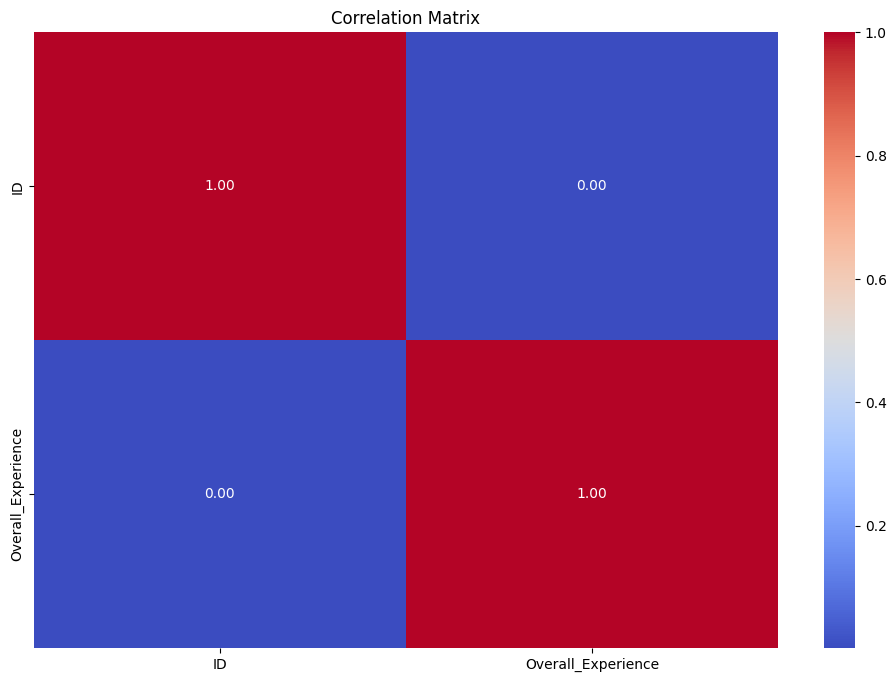

In [ ]:
def plot_correlation_matrix(df):
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=['int64', 'float64'])

    plt.figure(figsize=(12, 8))
    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

# Example: Run the updated correlation matrix plot
plot_correlation_matrix(df_train_s)


Function to Display Pie Charts for Categorical Features:

In [ ]:
def plot_pie_chart(df, feature):
    plt.figure(figsize=(8, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"))
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.show()

# Example: plot_pie_chart(df_train_s, 'Seat_Comfort')


Sample Display

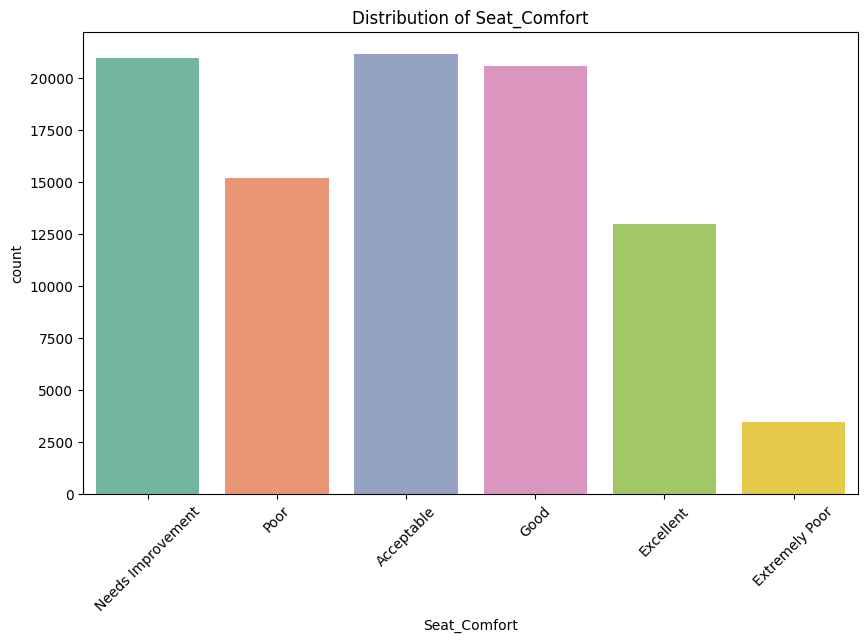

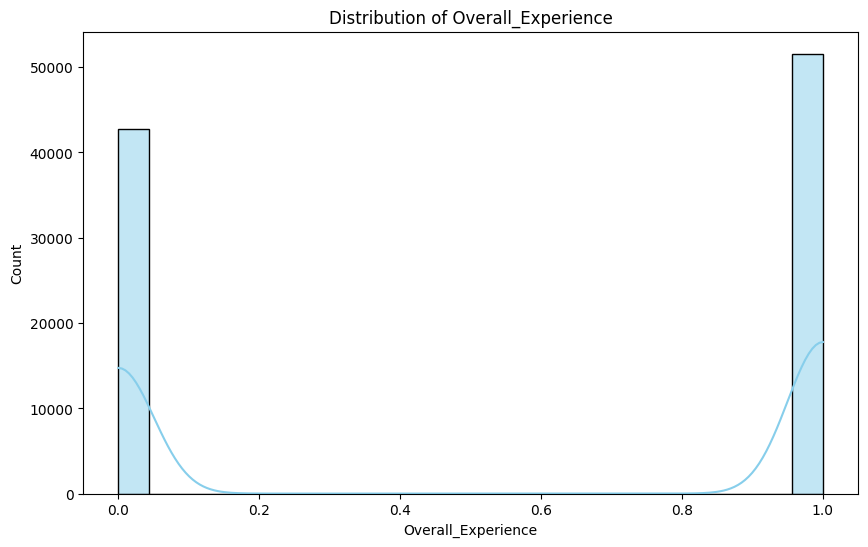

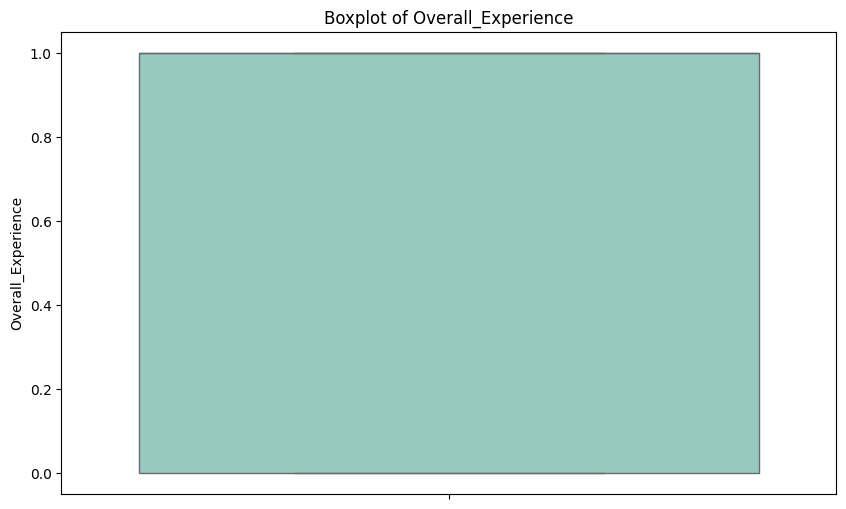

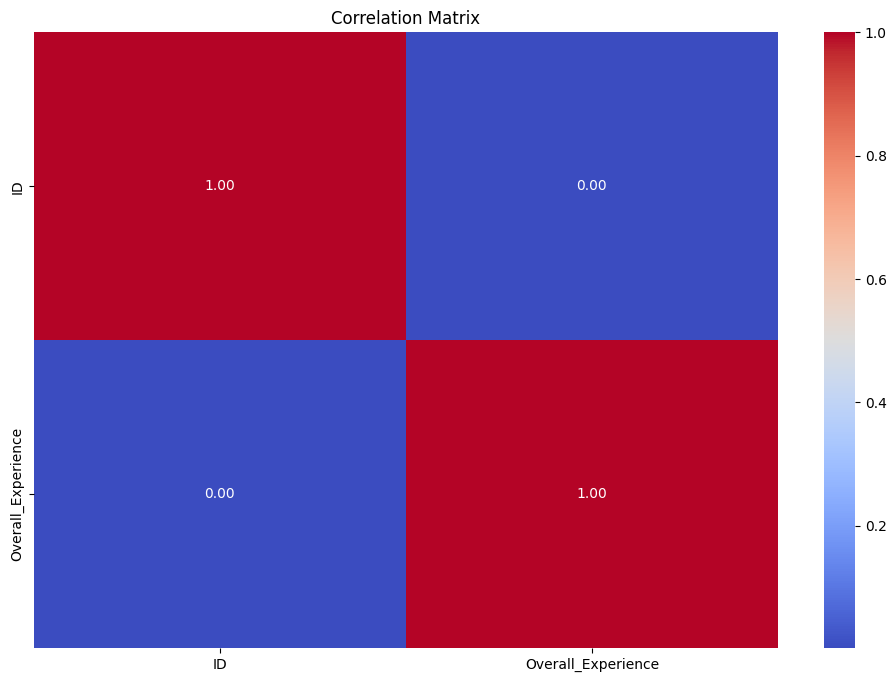

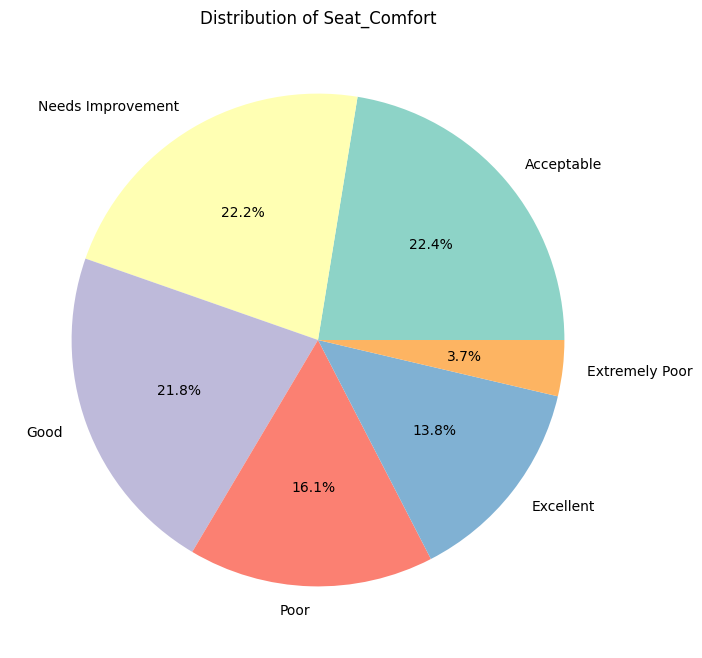

In [ ]:
# Visualize categorical features
plot_categorical_features(df_train_s, 'Seat_Comfort')

# Visualize numerical features
plot_numerical_features(df_train_s, 'Overall_Experience')

# Visualize boxplot for numerical features
plot_boxplot(df_train_s, 'Overall_Experience')

# Visualize correlation matrix
plot_correlation_matrix(df_train_s)

# Visualize pie chart for categorical features
plot_pie_chart(df_train_s, 'Seat_Comfort')


Distribution of the Target Variable (Overall_Experience)

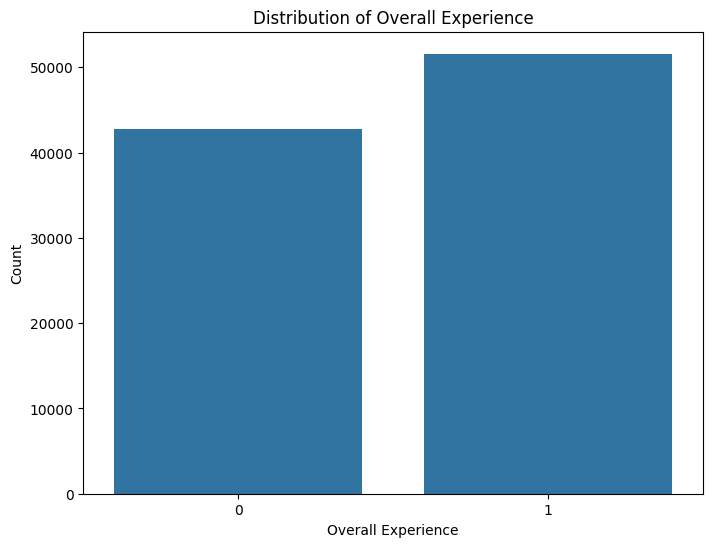

In [ ]:
def plot_target_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Overall_Experience', data=df)
    plt.title('Distribution of Overall Experience')
    plt.xlabel('Overall Experience')
    plt.ylabel('Count')
    plt.show()

plot_target_distribution(df_train_s)


Boxplots for Numerical Features

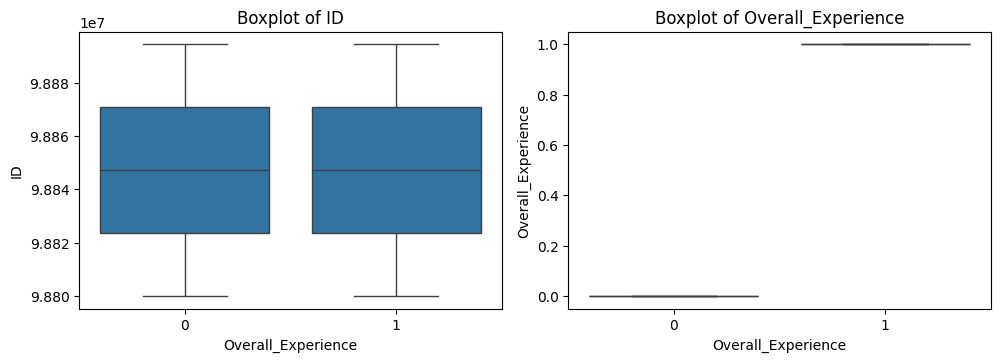

In [ ]:
def plot_boxplots(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x='Overall_Experience', y=column, data=df)
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(df_train_s)


Pie Charts for Categorical Features

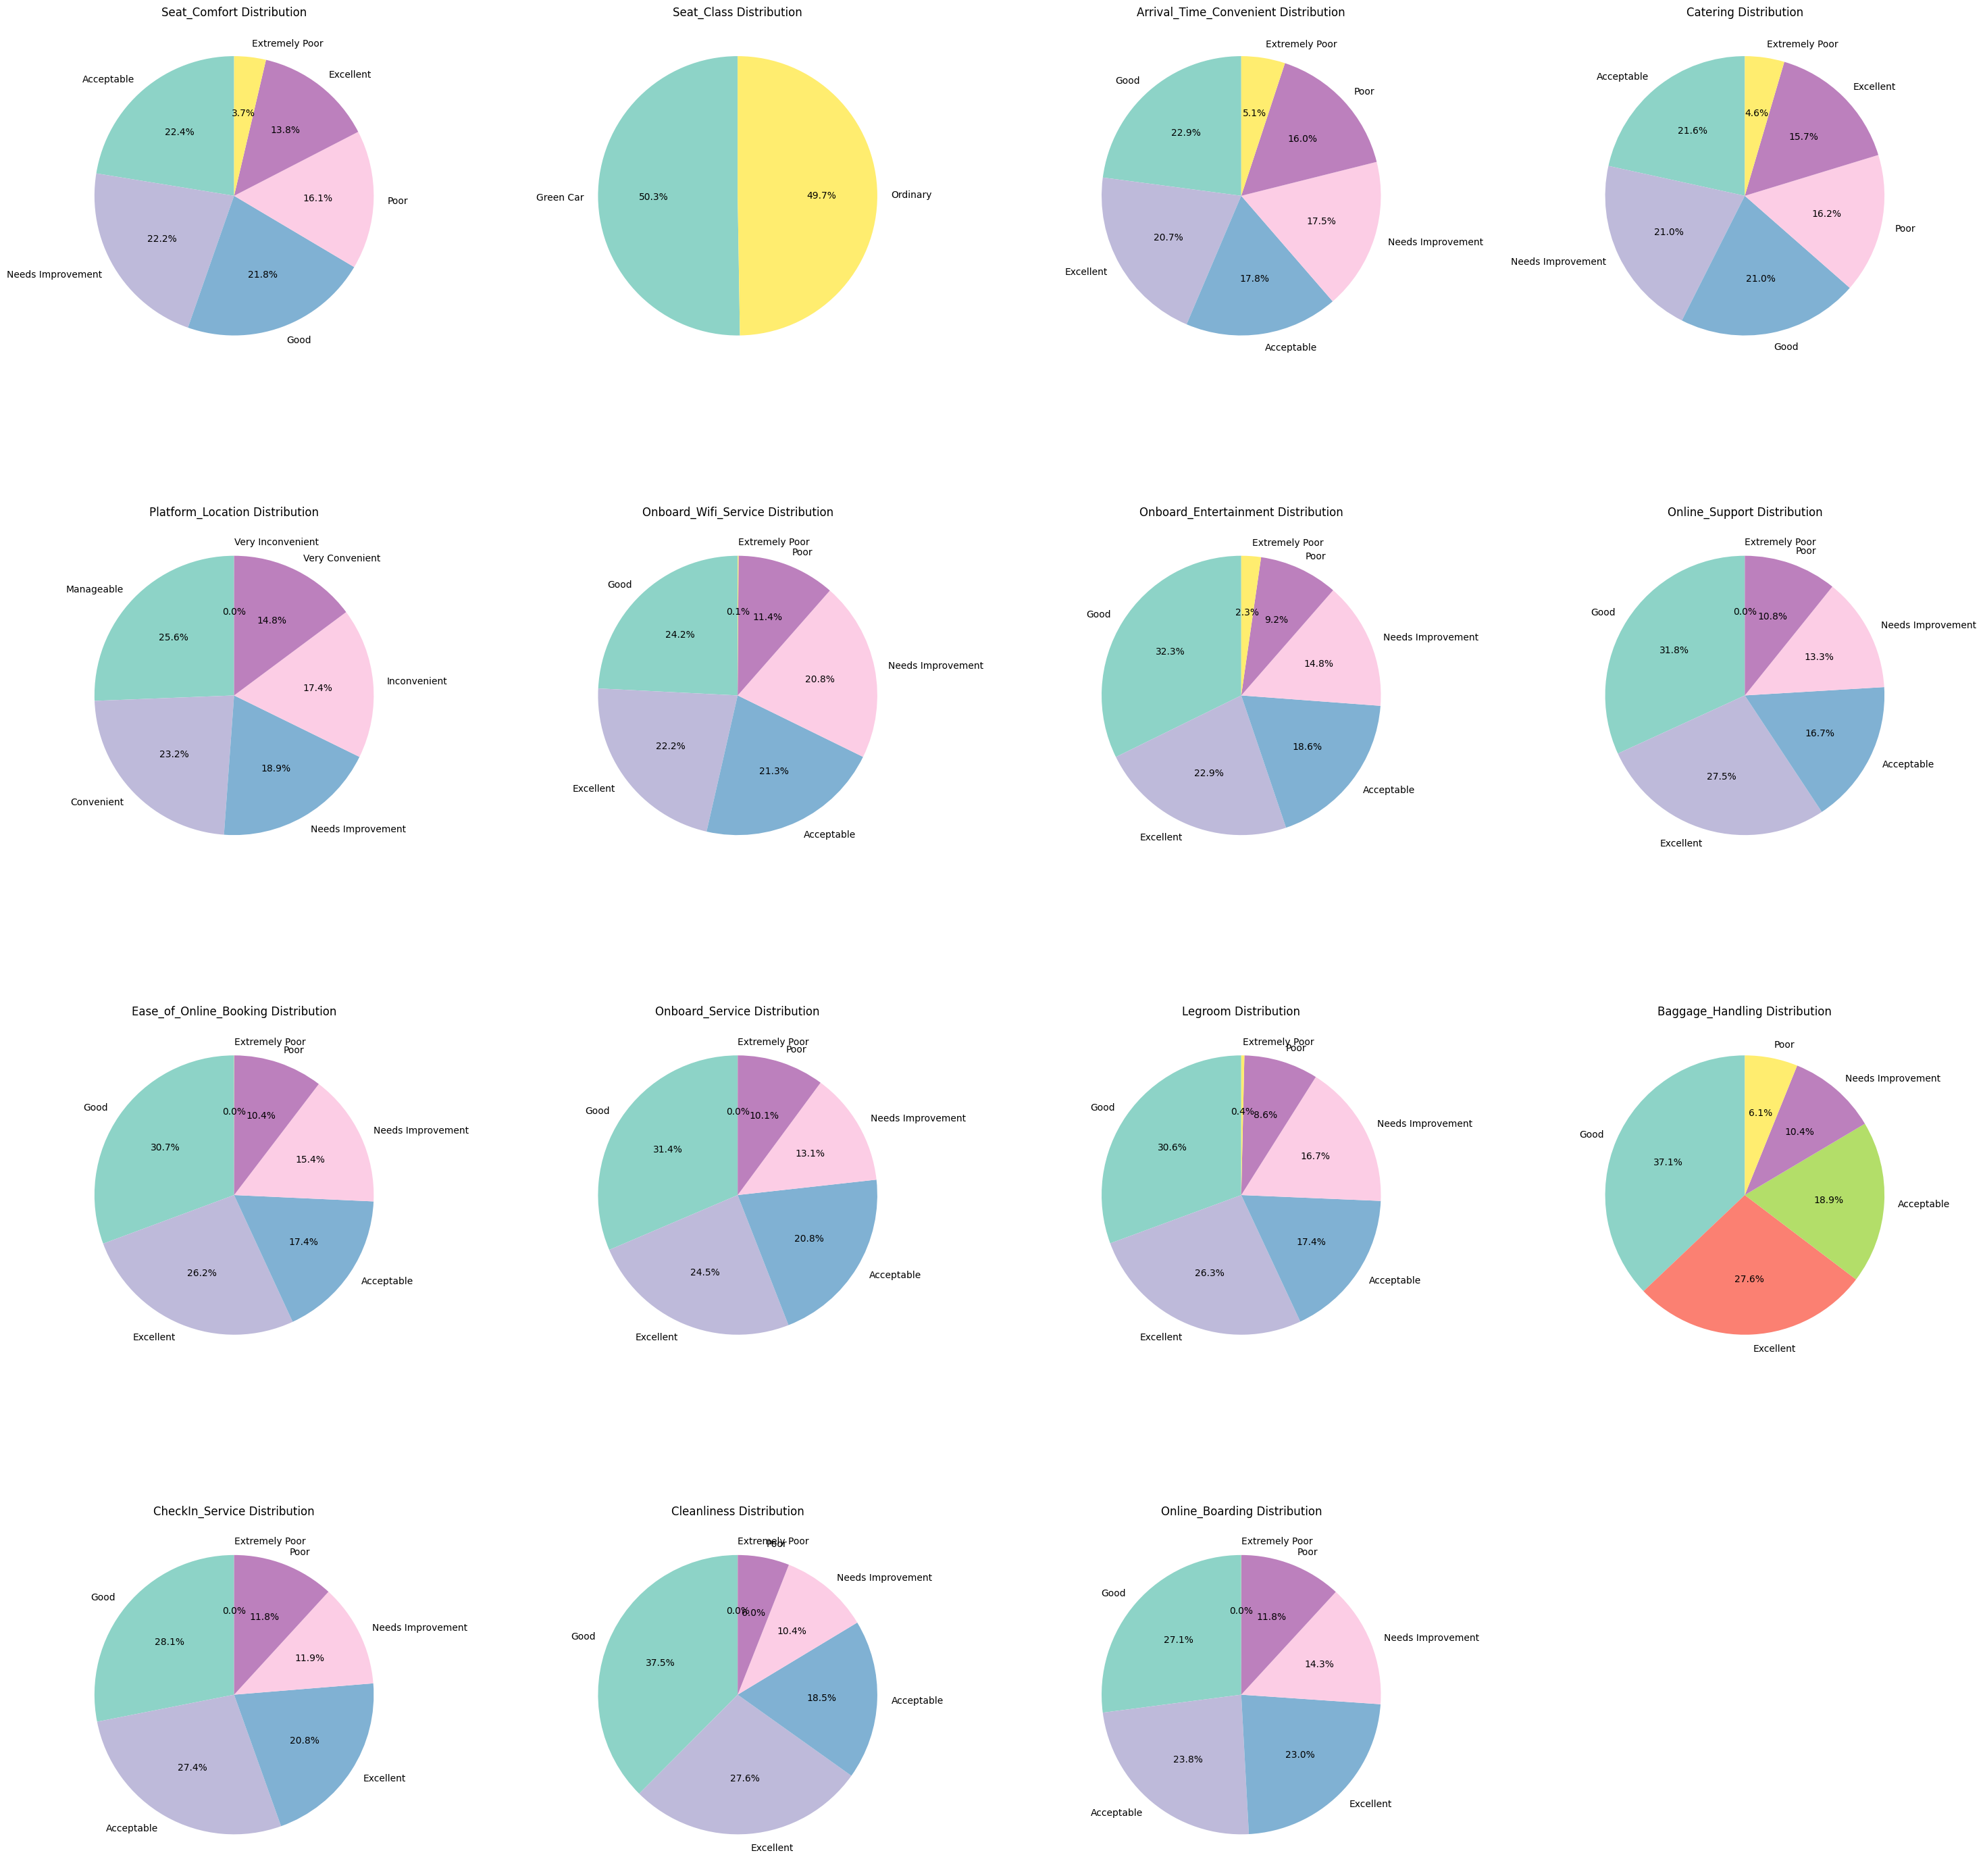

In [ ]:
def plot_pie_charts(df):
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

    # Adjust the figure size based on the number of categorical columns
    plt.figure(figsize=(30, 30))

    # Calculate the number of rows and columns for the subplots grid
    num_plots = len(categorical_columns)
    num_cols = 4  # Number of columns in the grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', textprops={'fontsize': 10})
        plt.title(f'{column} Distribution', fontsize=12)
        plt.ylabel('')  # Remove the y-label to make it cleaner

    plt.tight_layout(pad=3.0)  # Increase padding between plots
    plt.show()

plot_pie_charts(df_train_s)


Histograms for Numerical Features

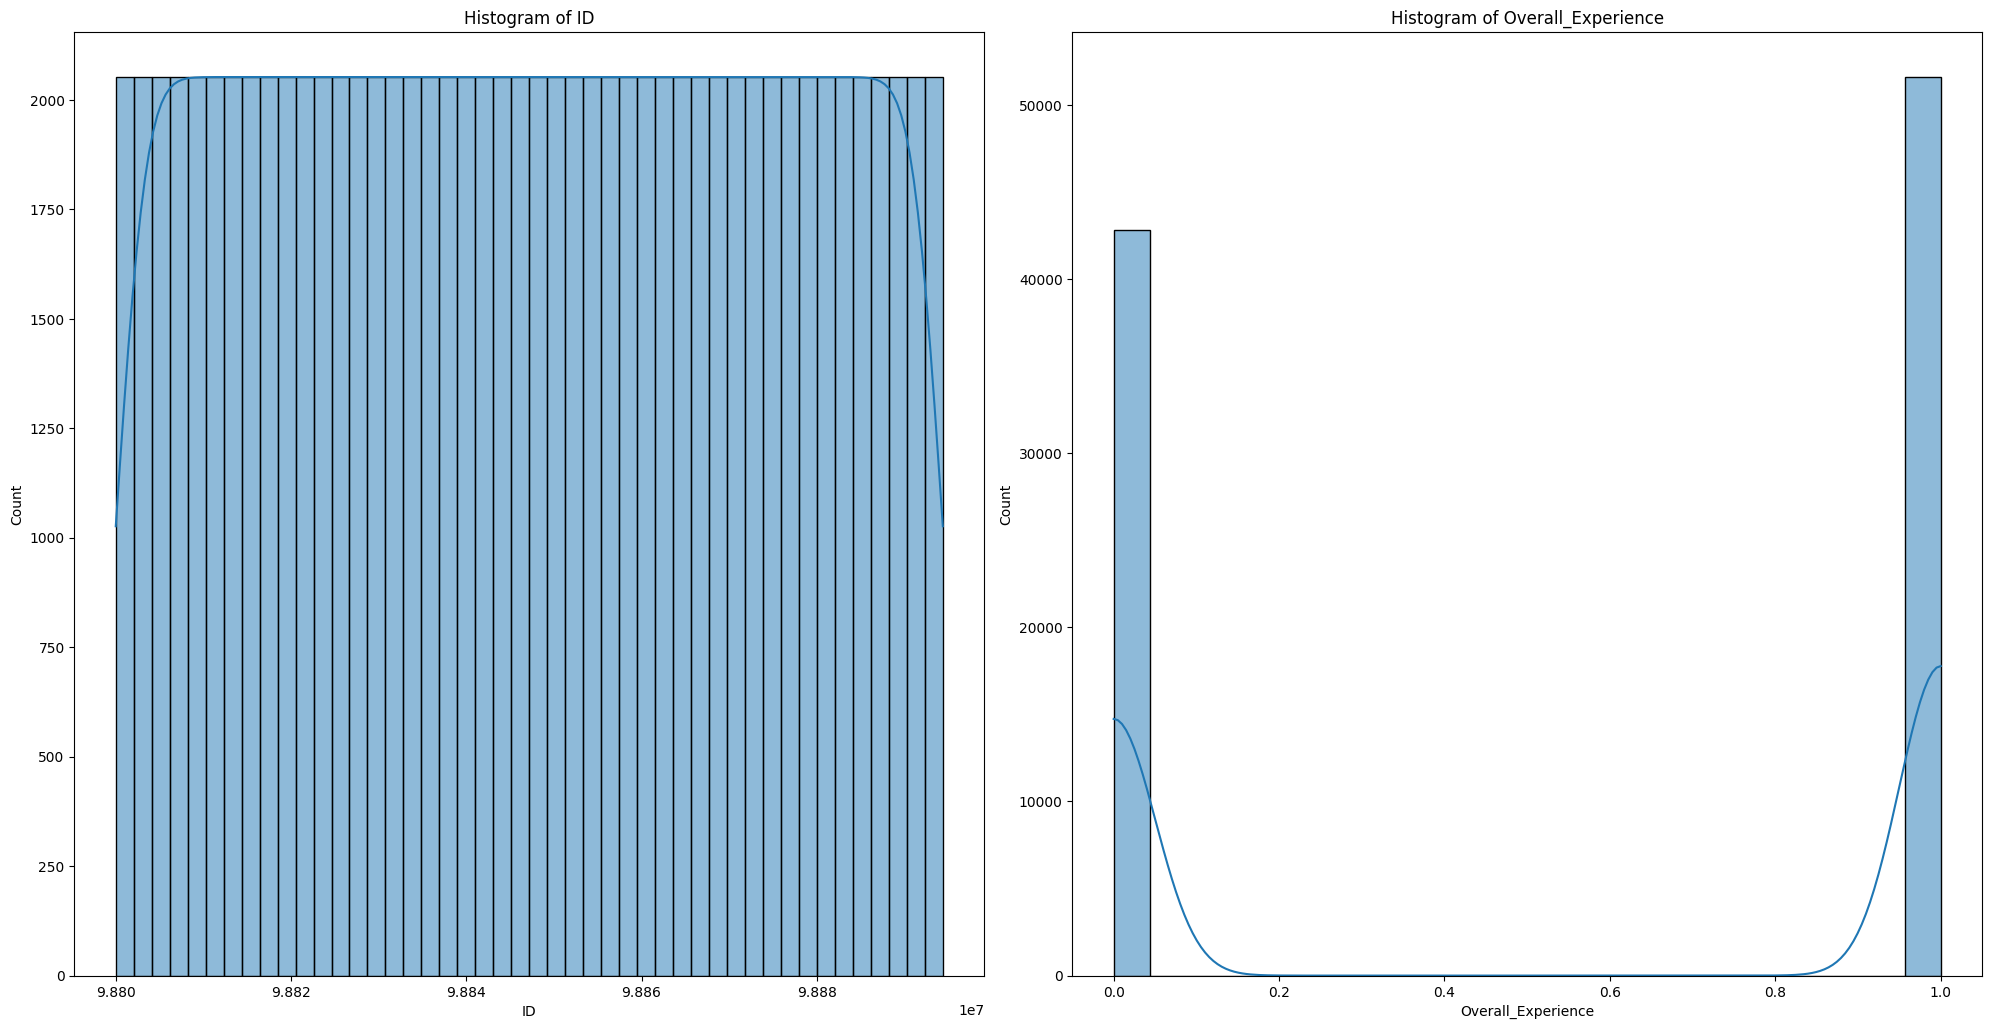

In [ ]:
def plot_histograms(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(30, 30))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

plot_histograms(df_train_s)


Pairplot

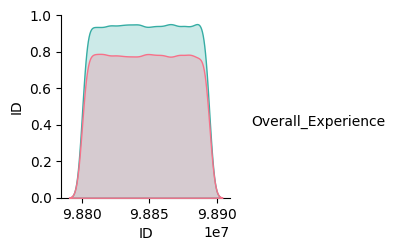

<Figure size 2000x2000 with 0 Axes>

In [ ]:
def plot_pairplot(df):
    sns.pairplot(df, hue='Overall_Experience', diag_kind='kde', palette='husl')
    plt.figure(figsize=(20, 20))
    plt.show()

plot_pairplot(df_train_s)


Bar Plots for Categorical Features

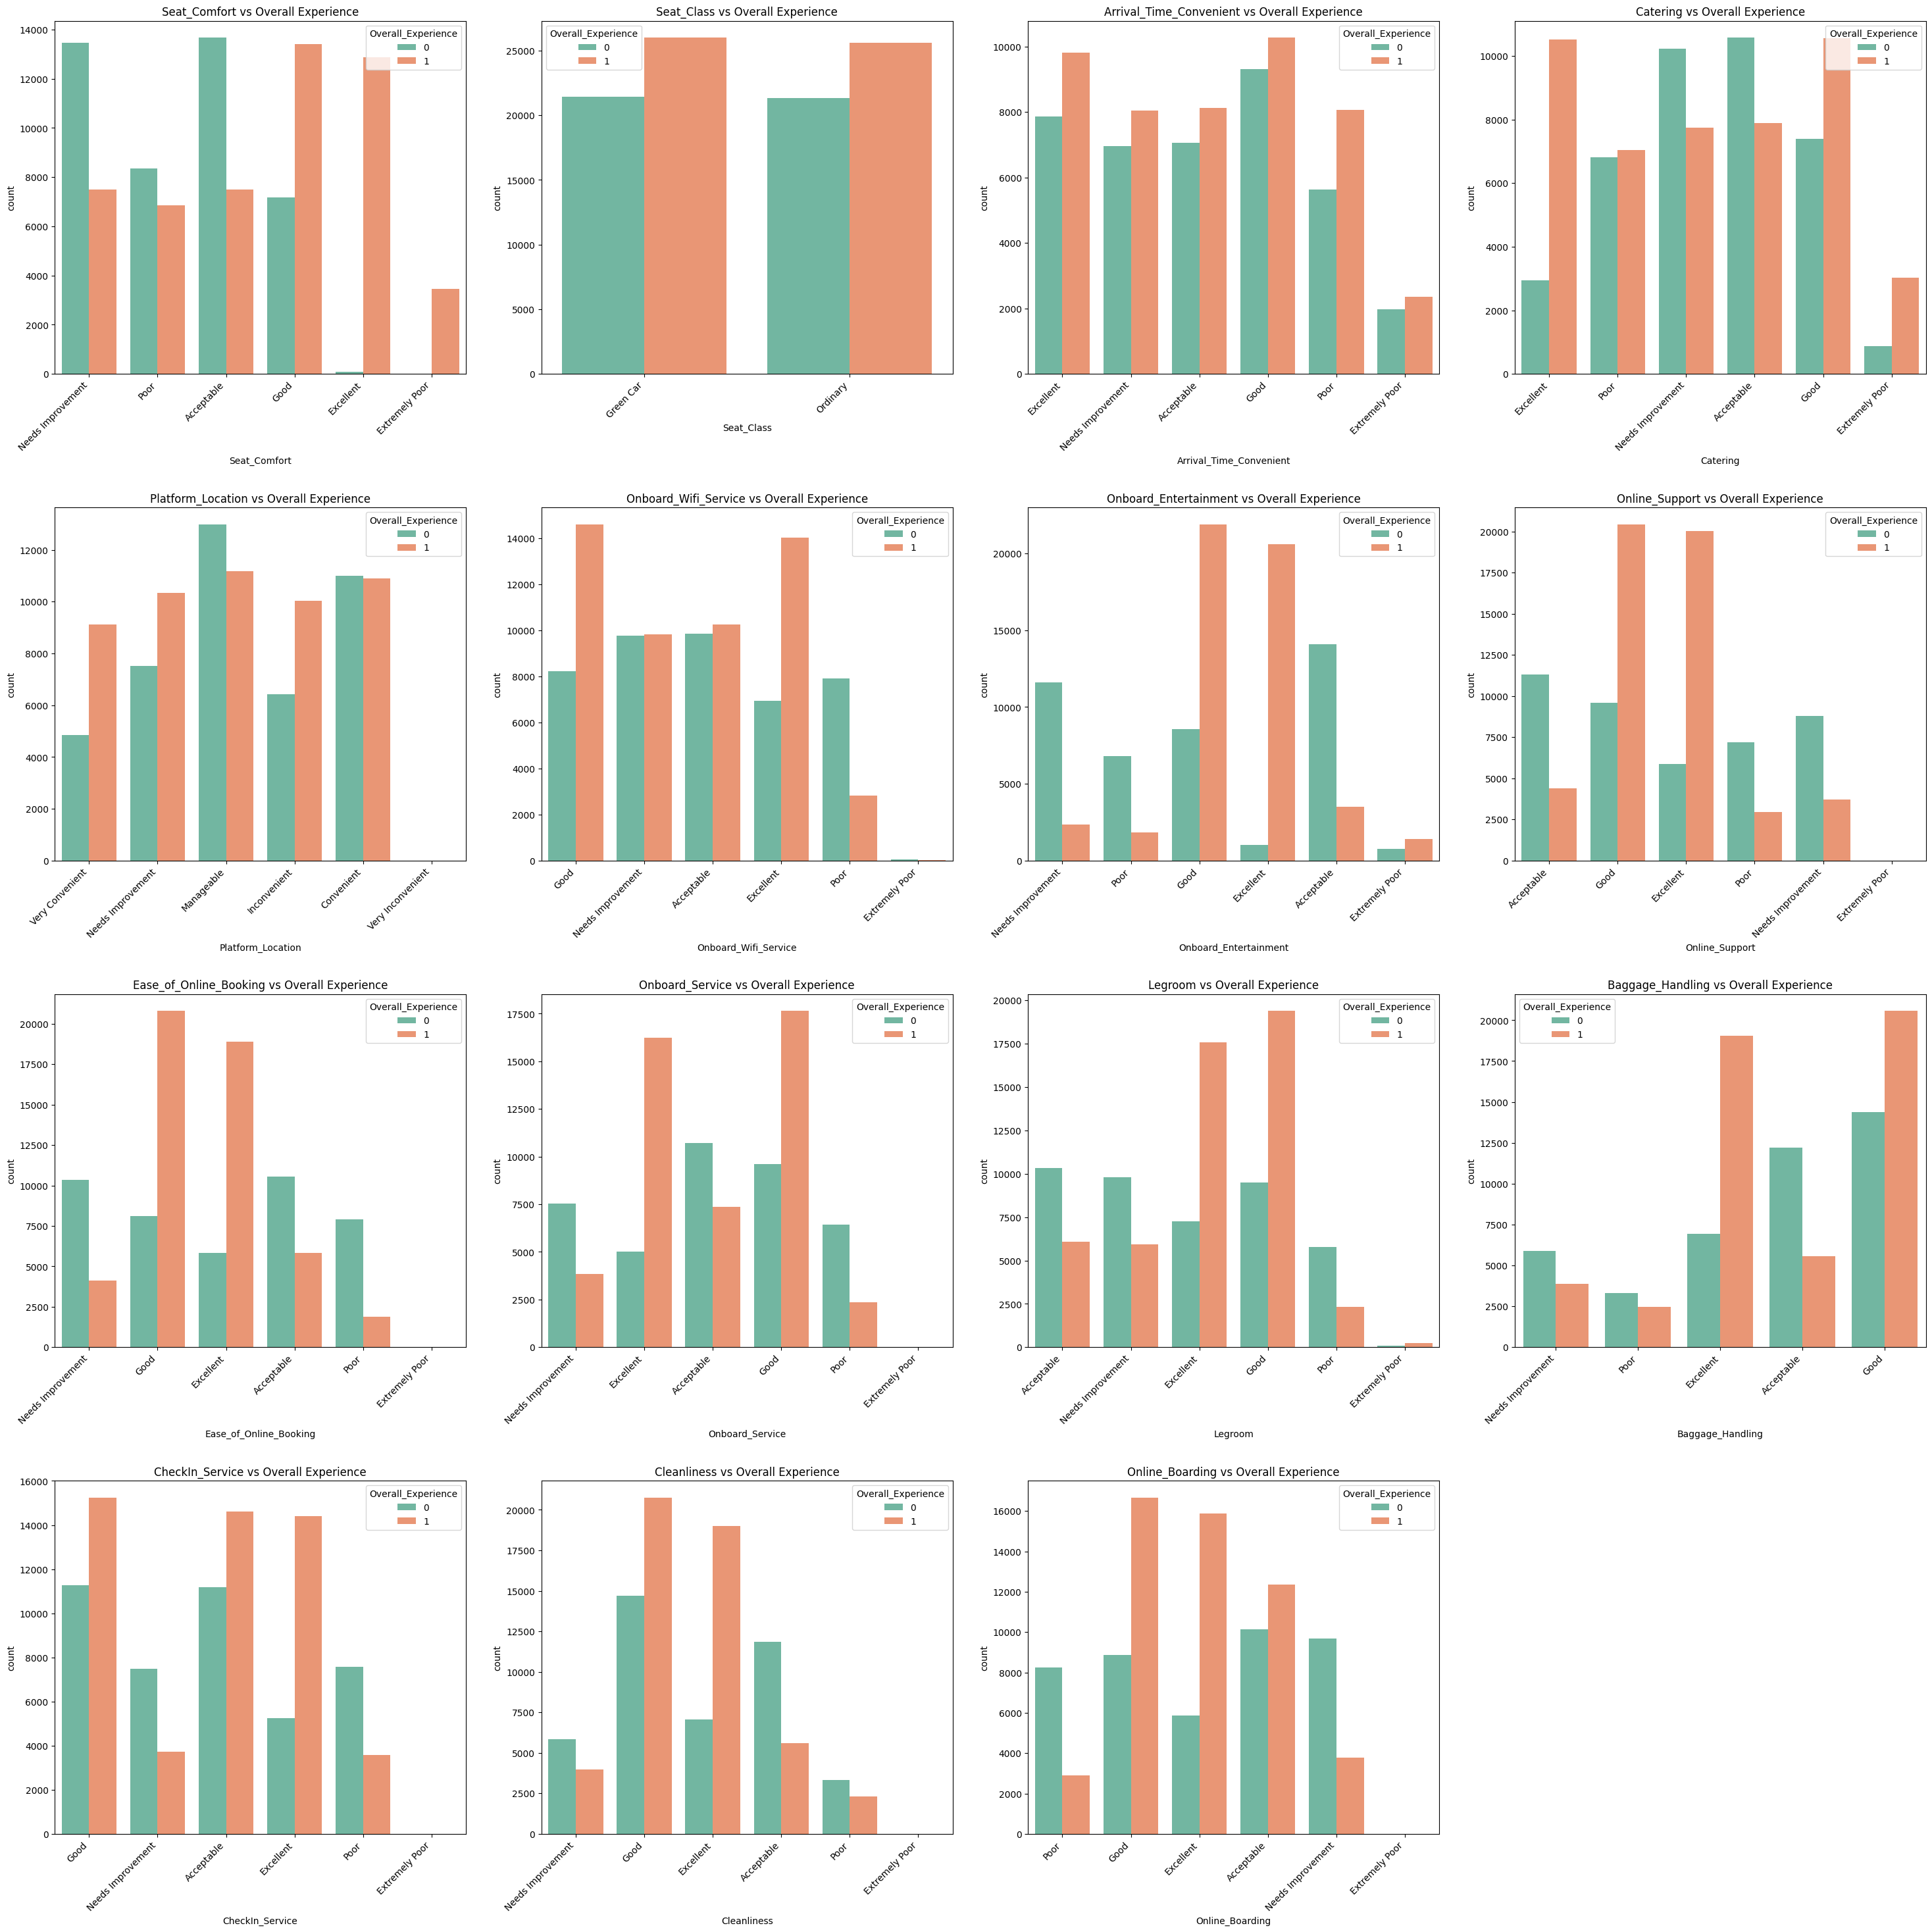

In [ ]:
def plot_barplots(df):
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

    # Adjust the figure size based on the number of categorical columns
    plt.figure(figsize=(30, 30))

    # Calculate the number of rows and columns for the subplots grid
    num_plots = len(categorical_columns)
    num_cols = 4  # Number of columns in the grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.countplot(x=column, hue='Overall_Experience', data=df, palette='Set2')
        plt.title(f'{column} vs Overall Experience')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    plt.tight_layout(pad=3.0)  # Increase padding between plots
    plt.show()

plot_barplots(df_train_s)


# Bivariate Analysis

Correlation Heatmap:

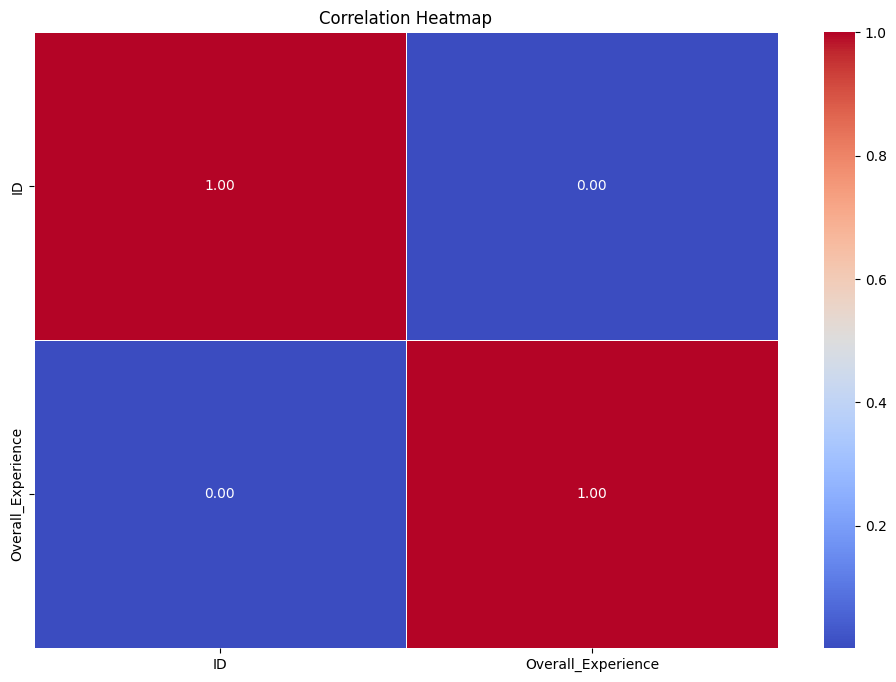

In [ ]:
def plot_correlation_heatmap(df):
    # Select only numerical columns for correlation matrix
    numerical_df = df.select_dtypes(include=['float64', 'int64'])

    plt.figure(figsize=(12, 8))
    corr = numerical_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df_train_s)


Boxplots:

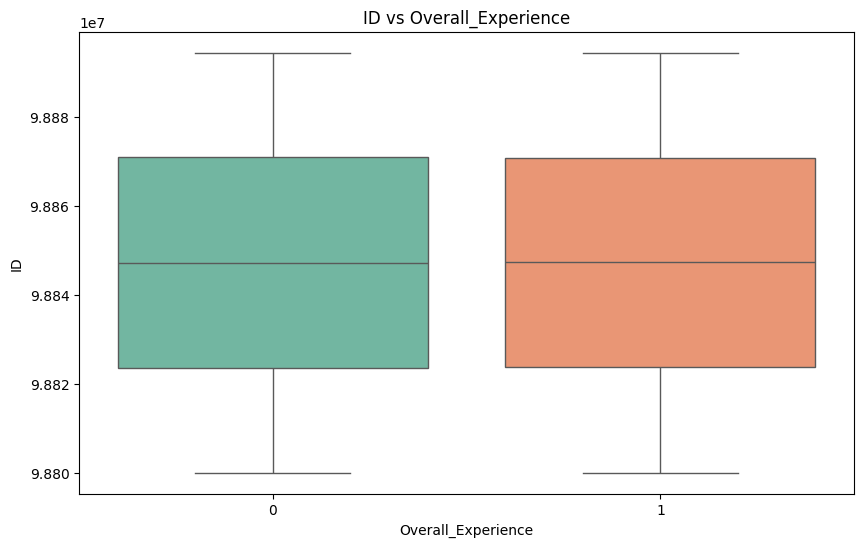

In [ ]:
def plot_boxplots(df, target):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for column in numerical_columns:
        if column != target:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=target, y=column, data=df, palette='Set2')
            plt.title(f'{column} vs {target}')
            plt.show()

plot_boxplots(df_train_s, 'Overall_Experience')


Scatter Plots:

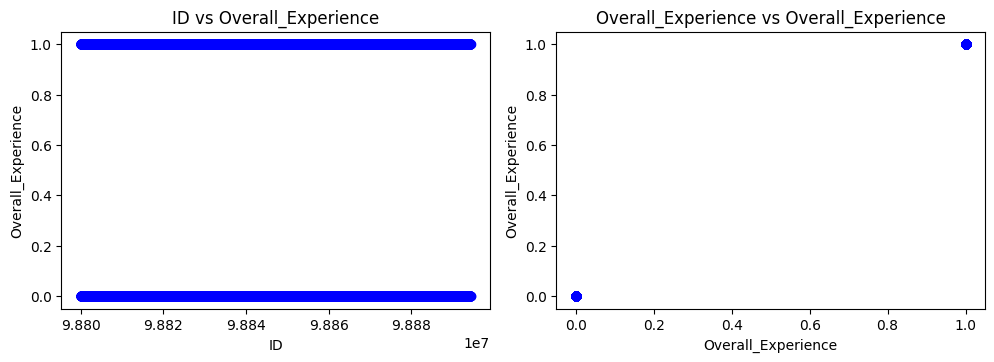

In [ ]:
def plot_scatter_plots(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        plt.scatter(df[column], df['Overall_Experience'], alpha=0.5, color='blue')
        plt.title(f'{column} vs Overall_Experience')
        plt.xlabel(column)
        plt.ylabel('Overall_Experience')

    plt.tight_layout()
    plt.show()

plot_scatter_plots(df_train_s)


Bar Plots (for categorical vs categorical)

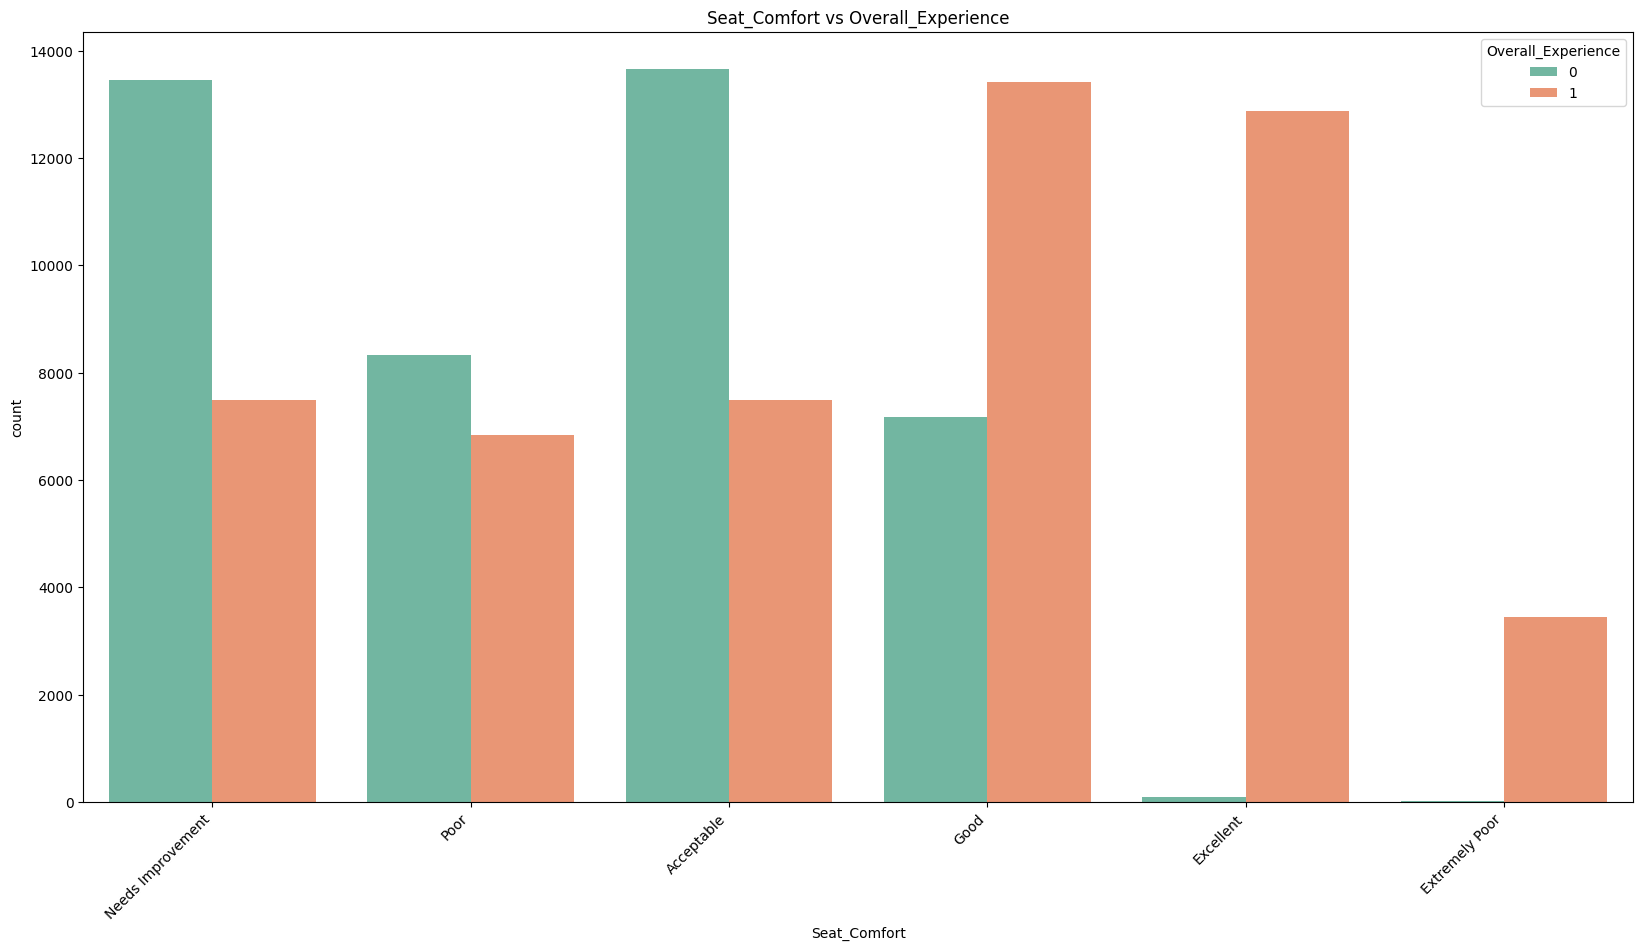

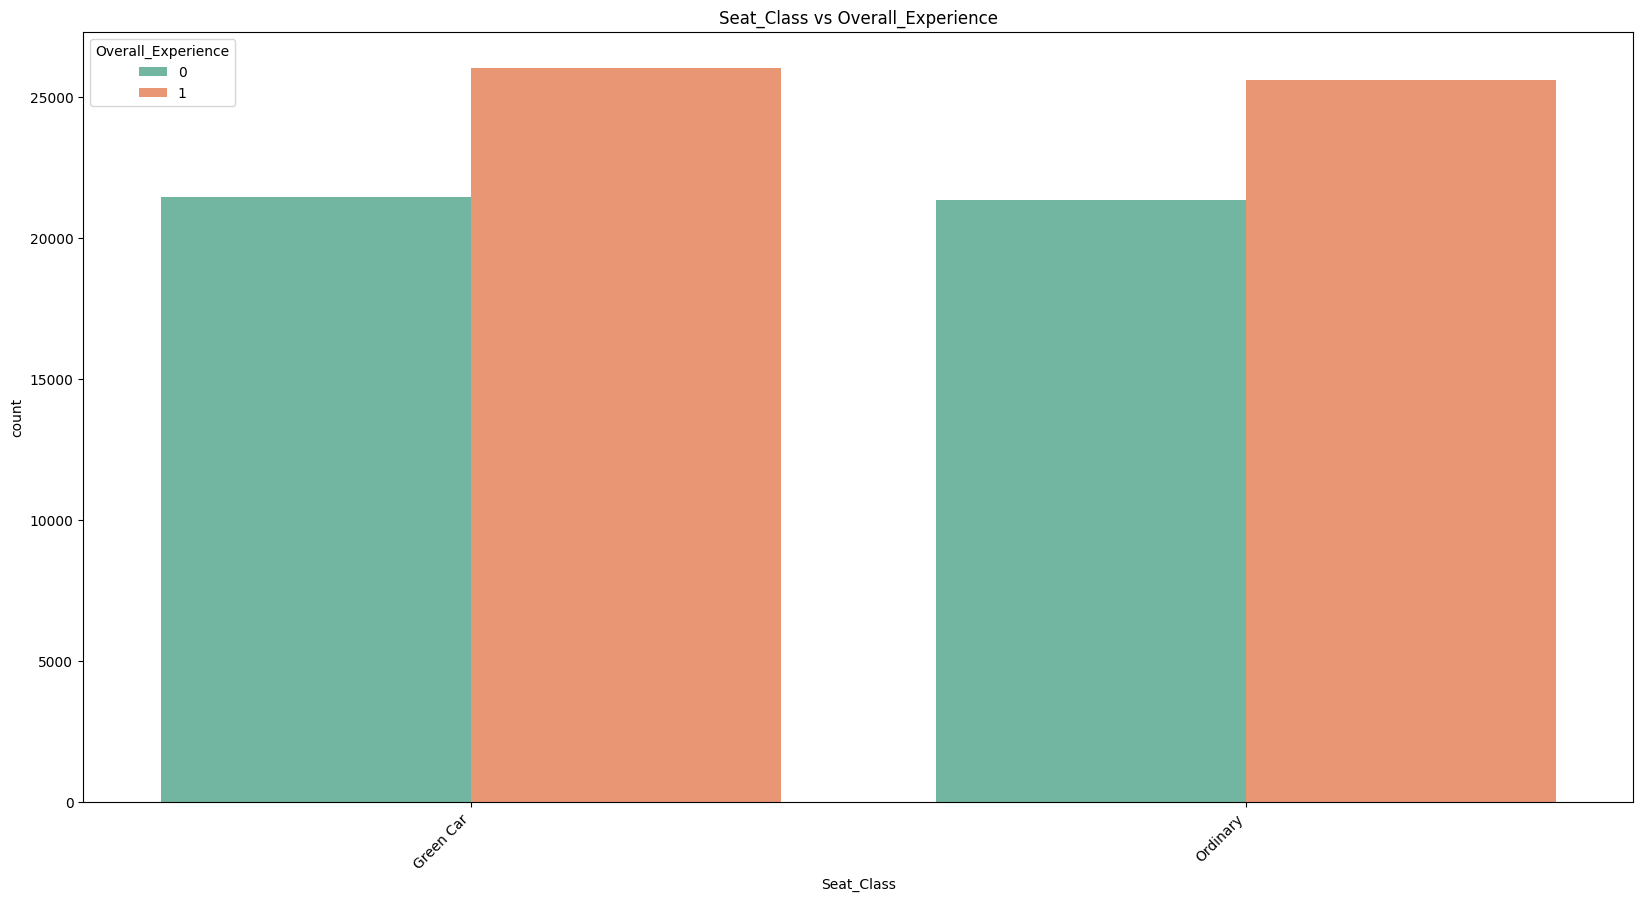

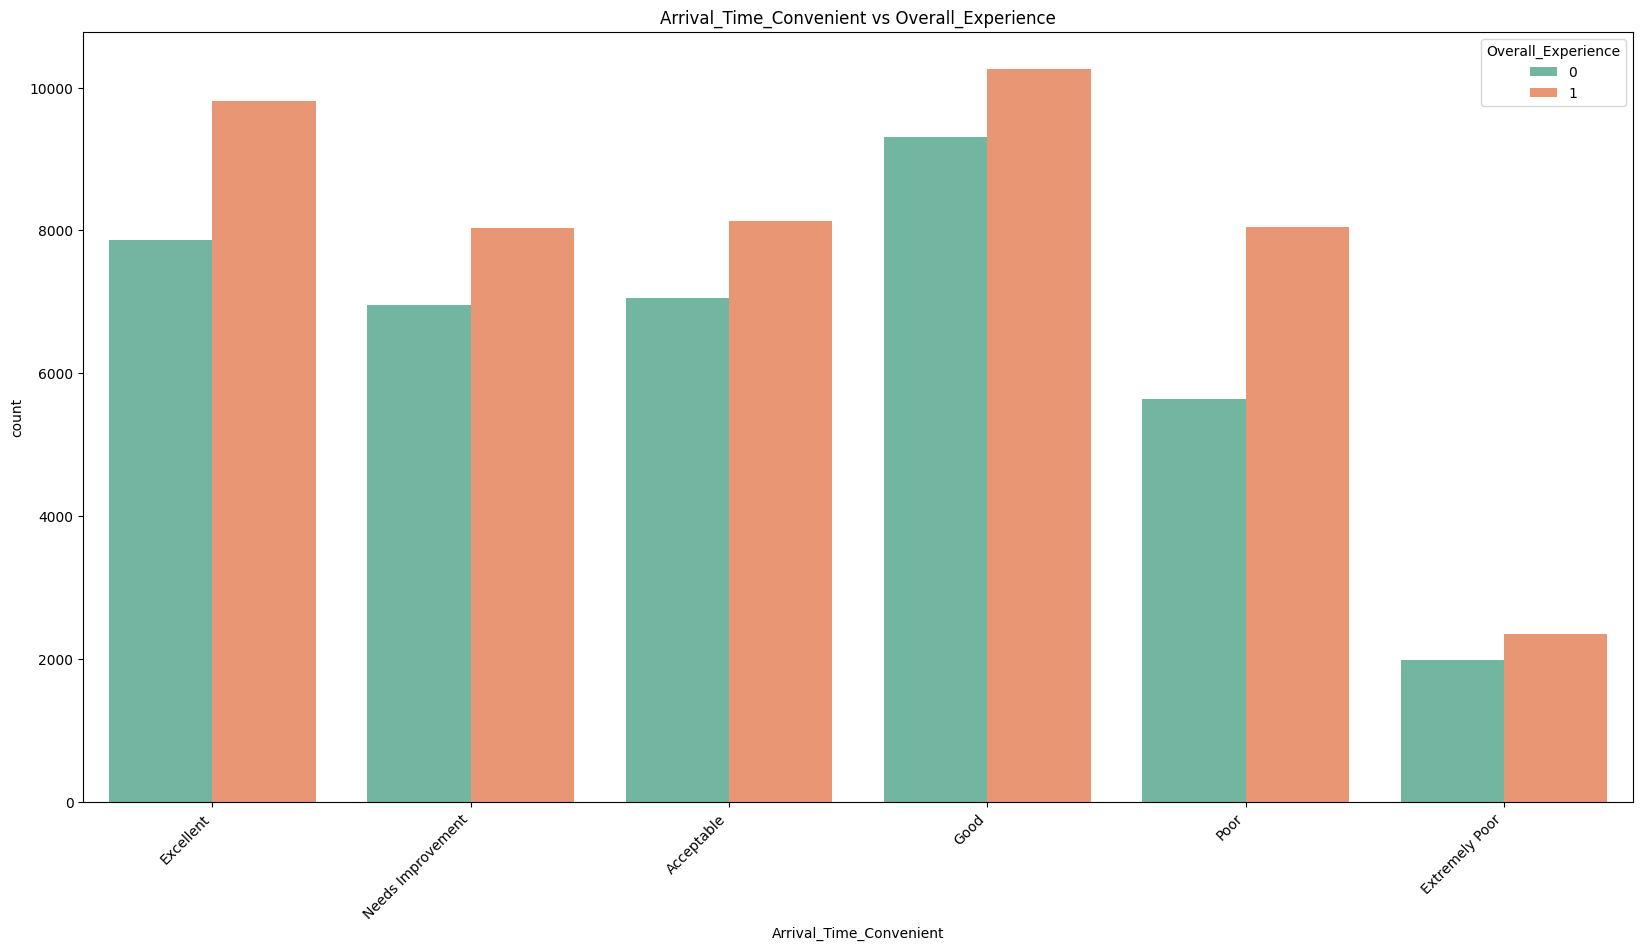

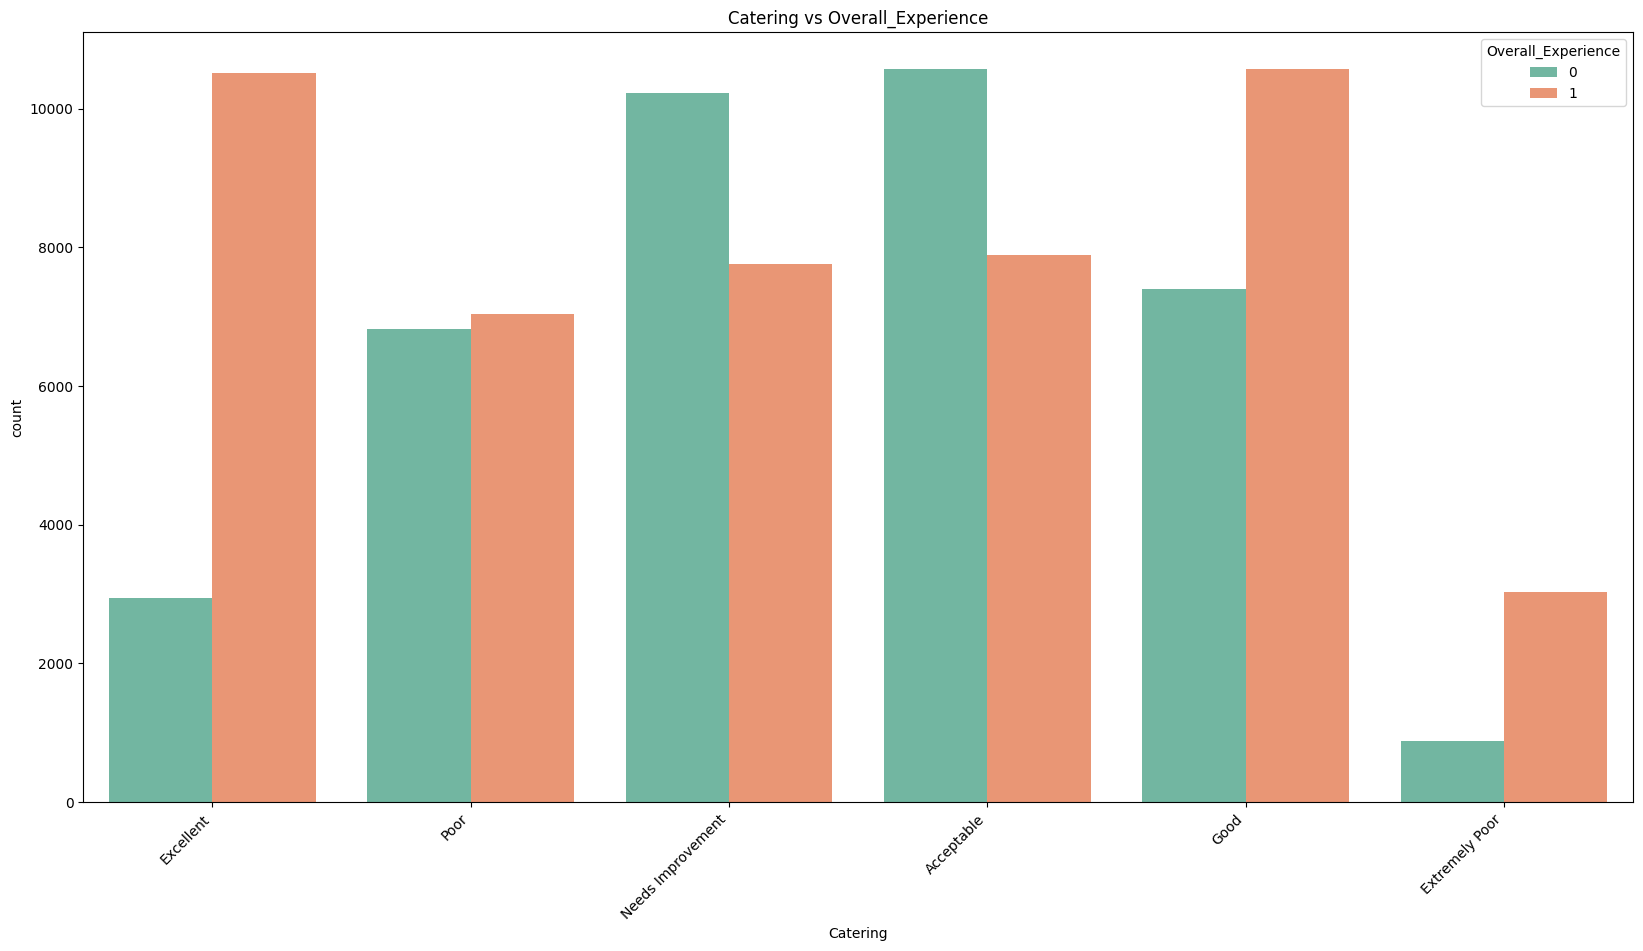

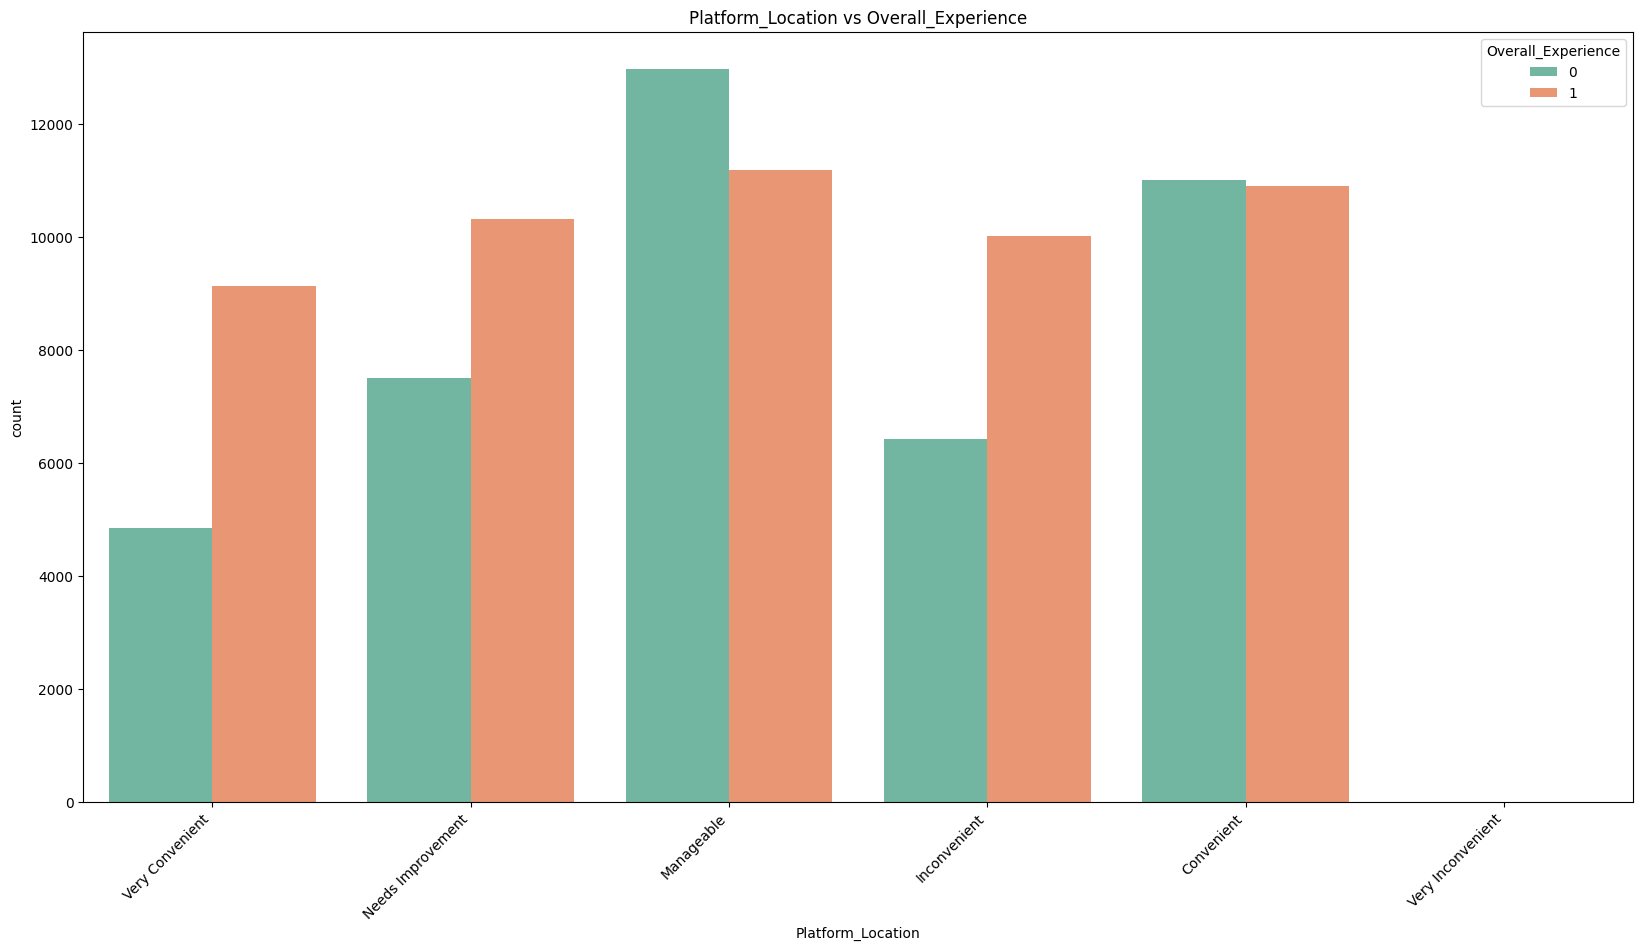

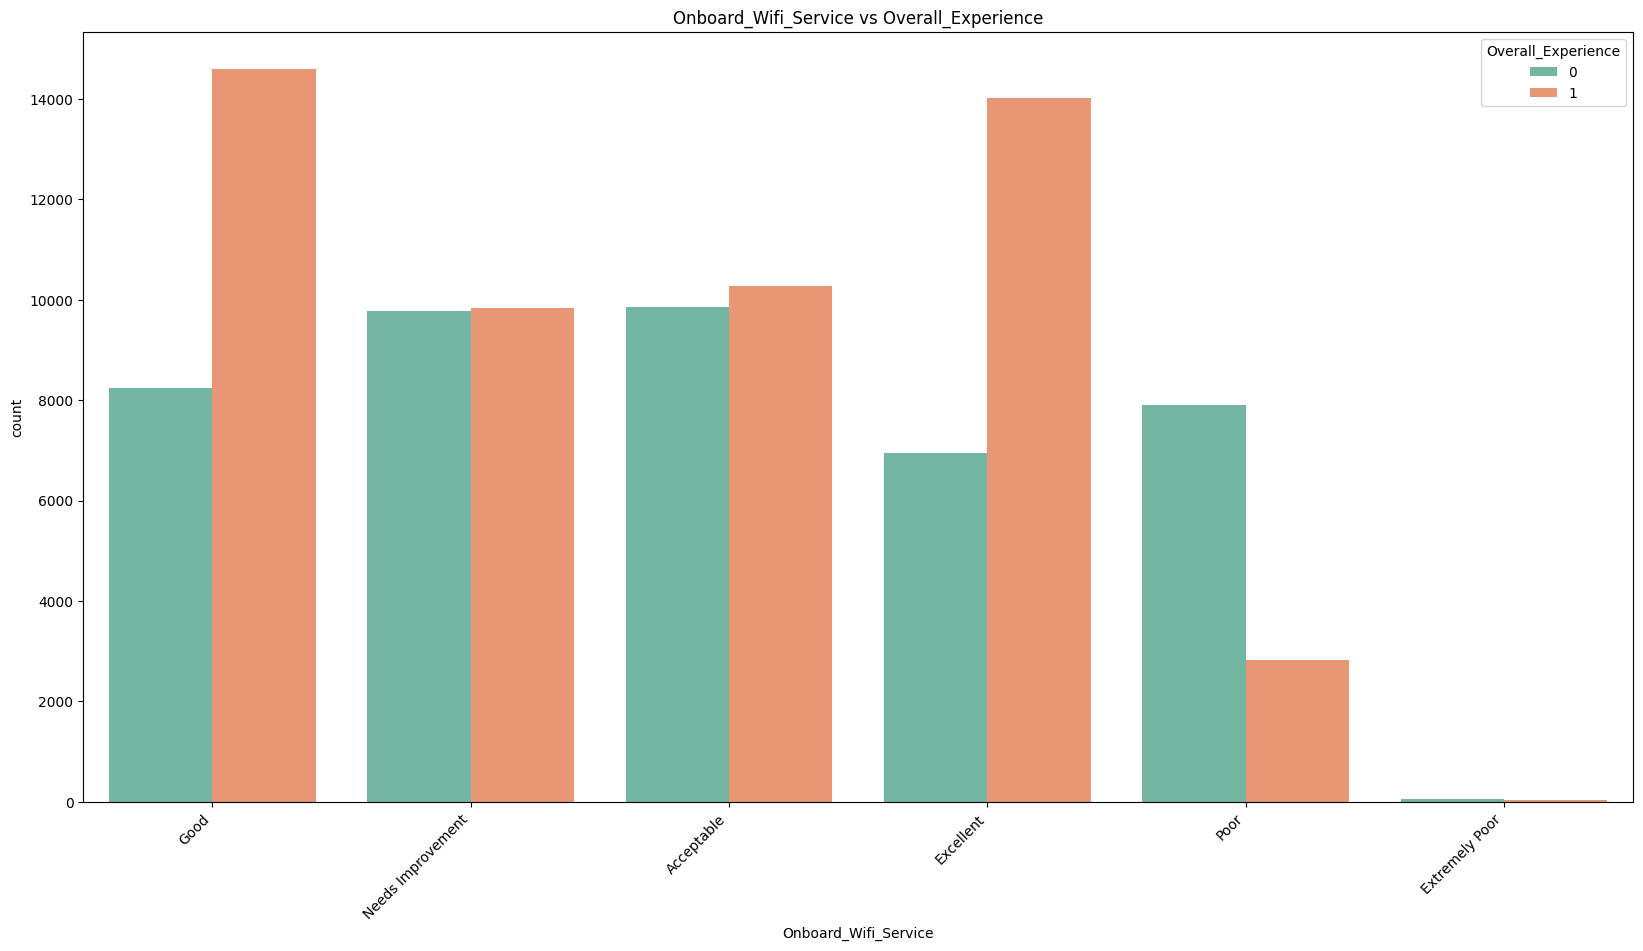

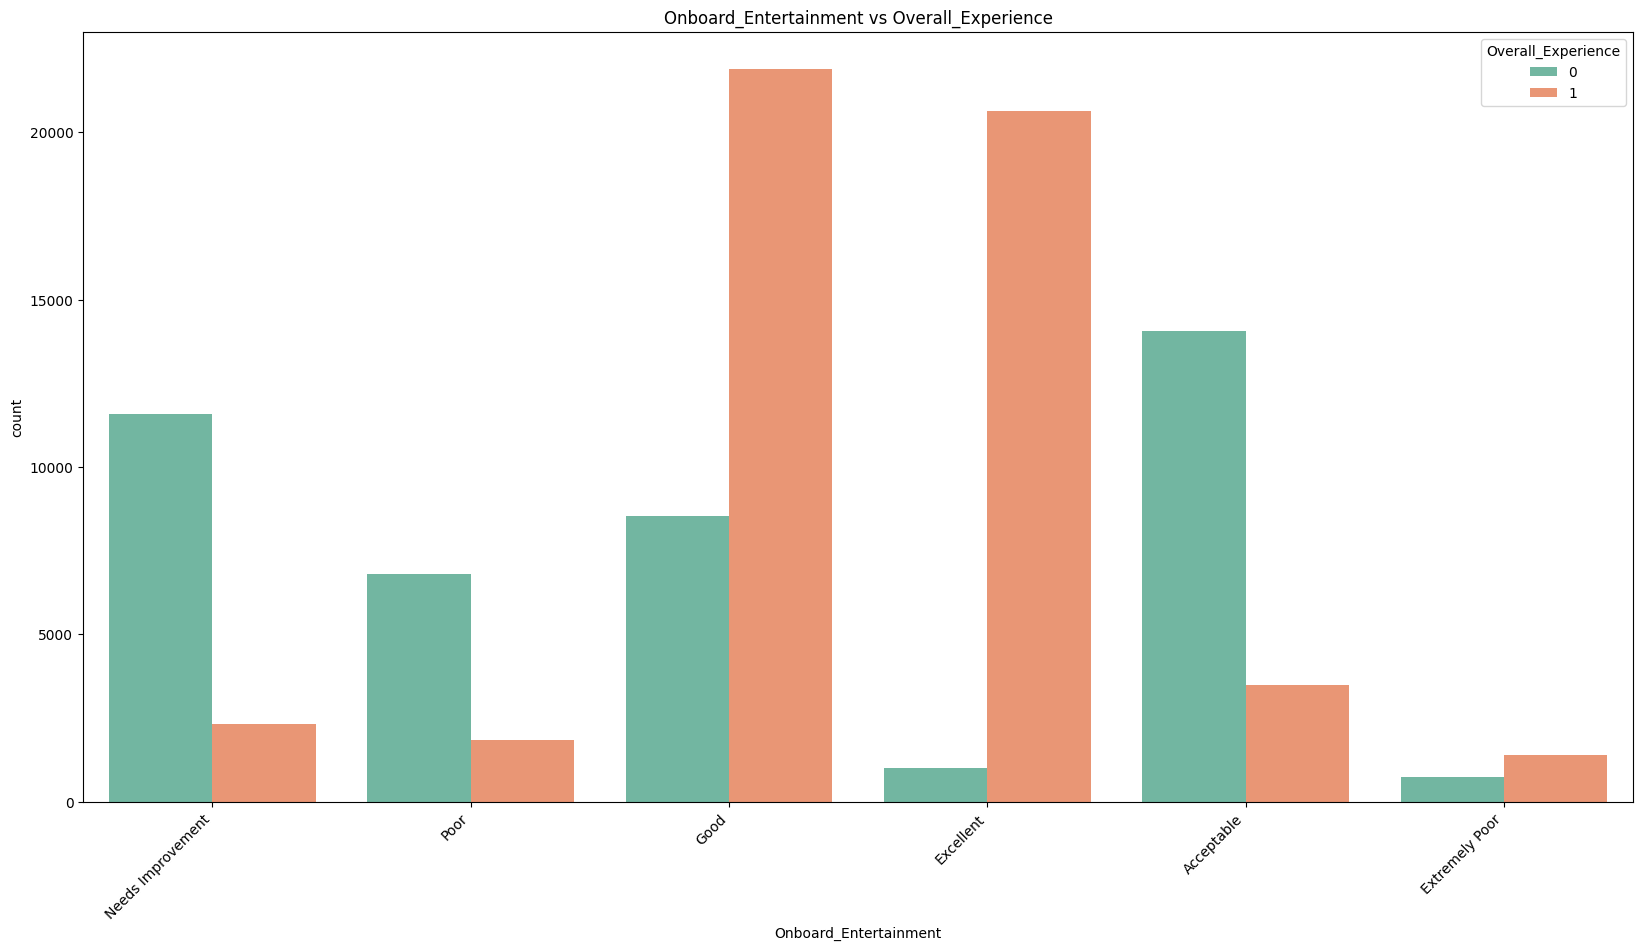

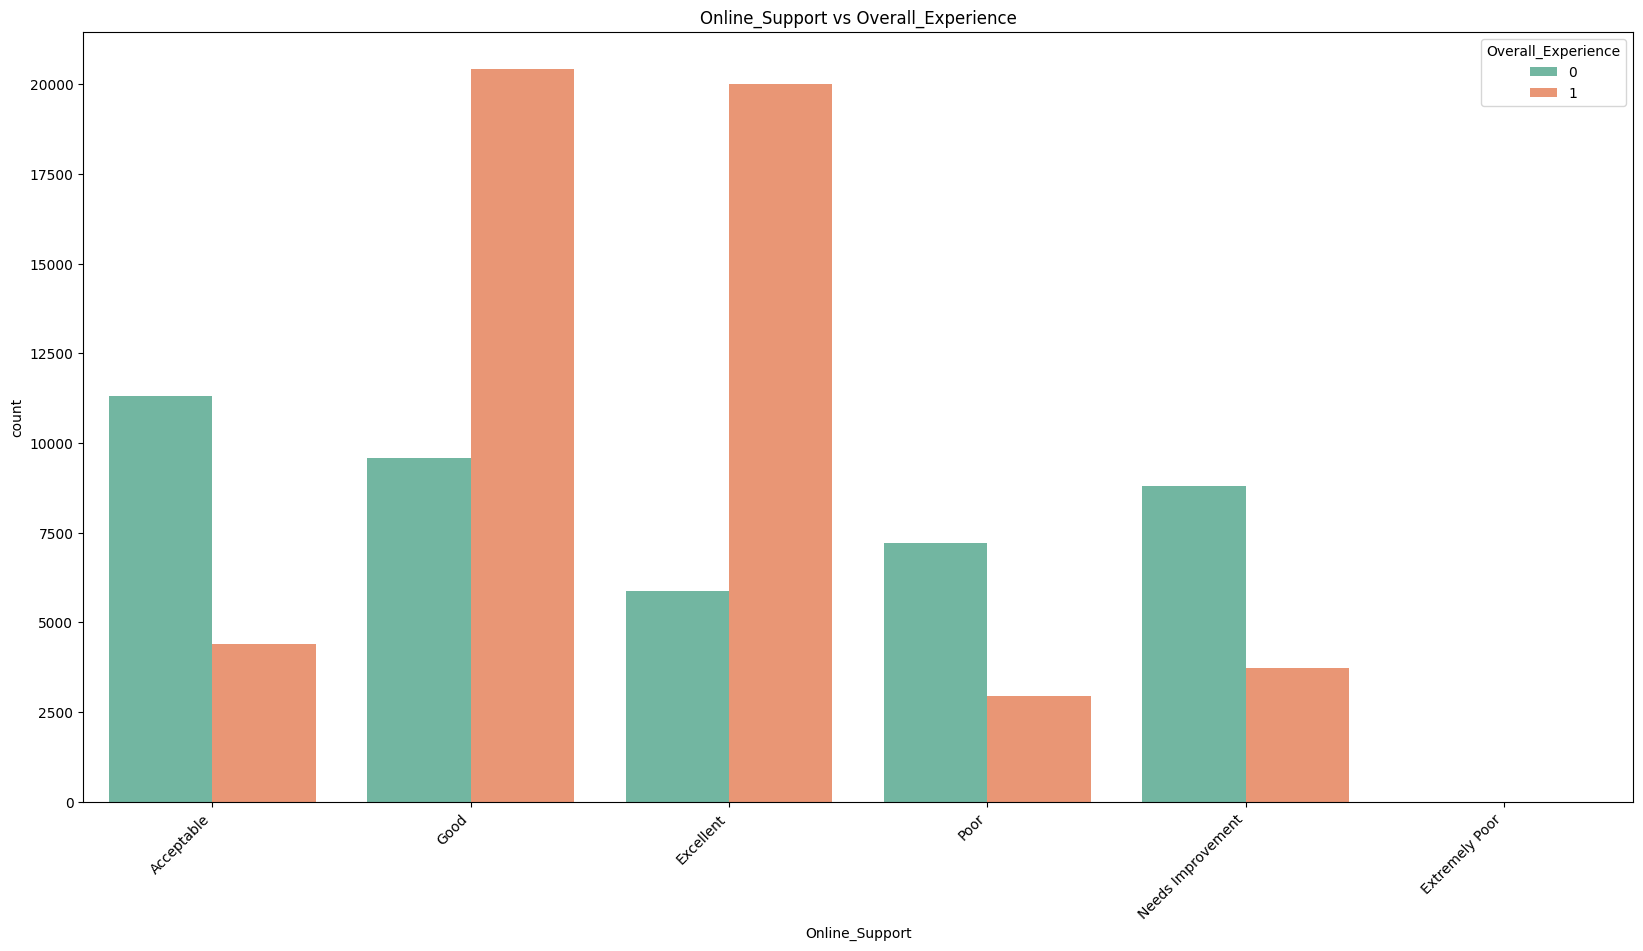

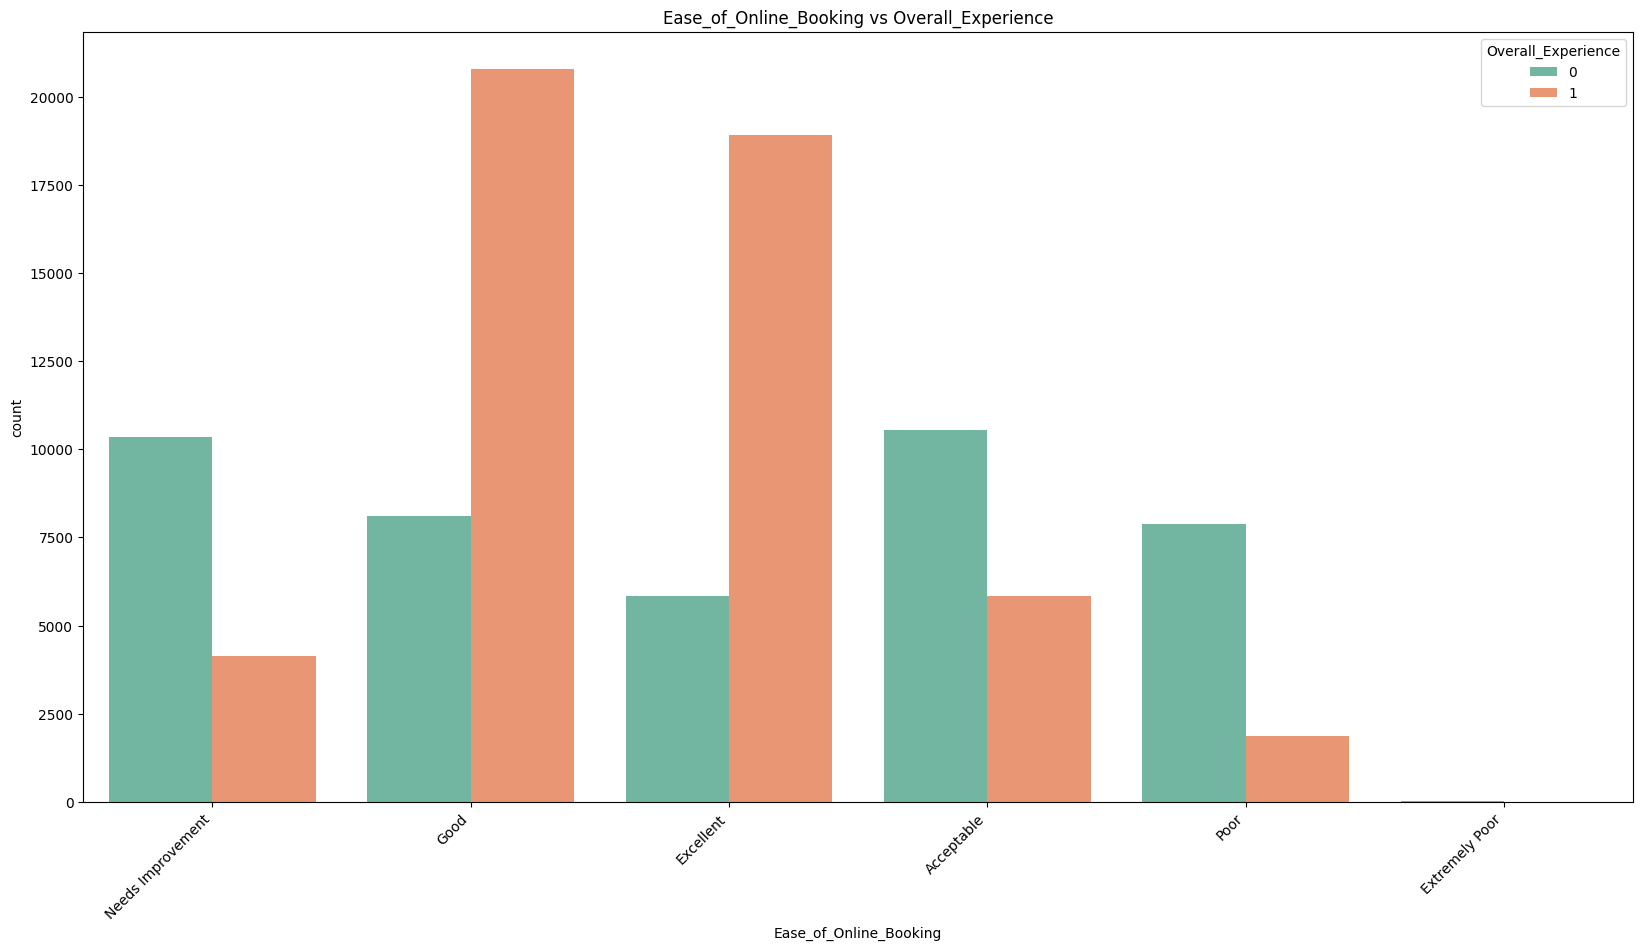

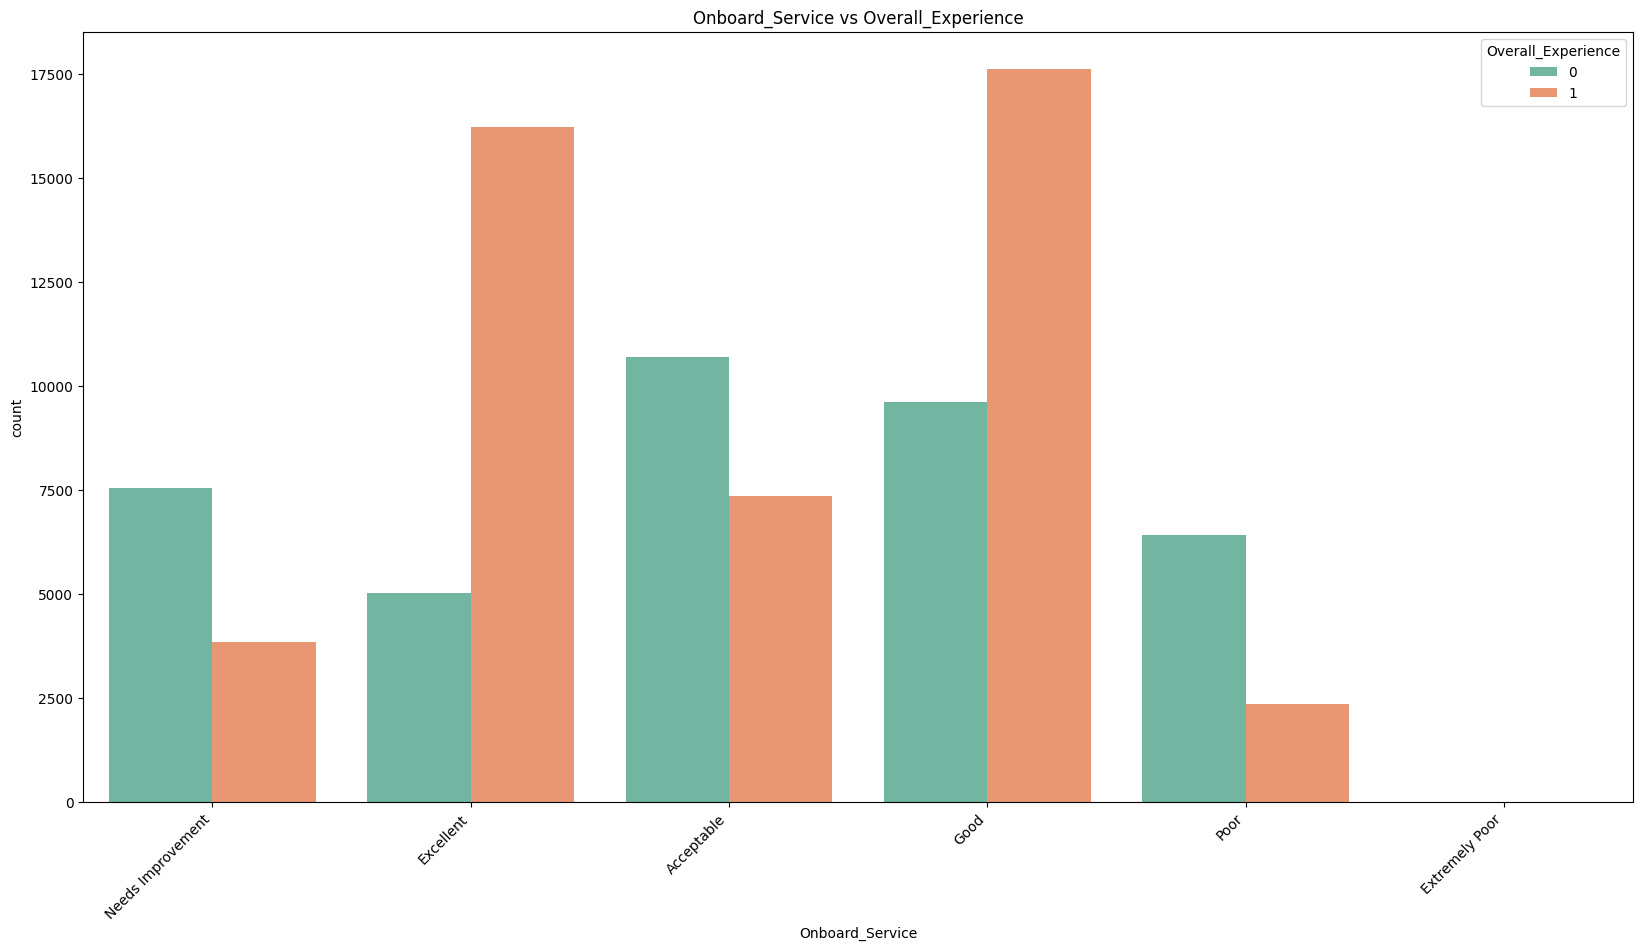

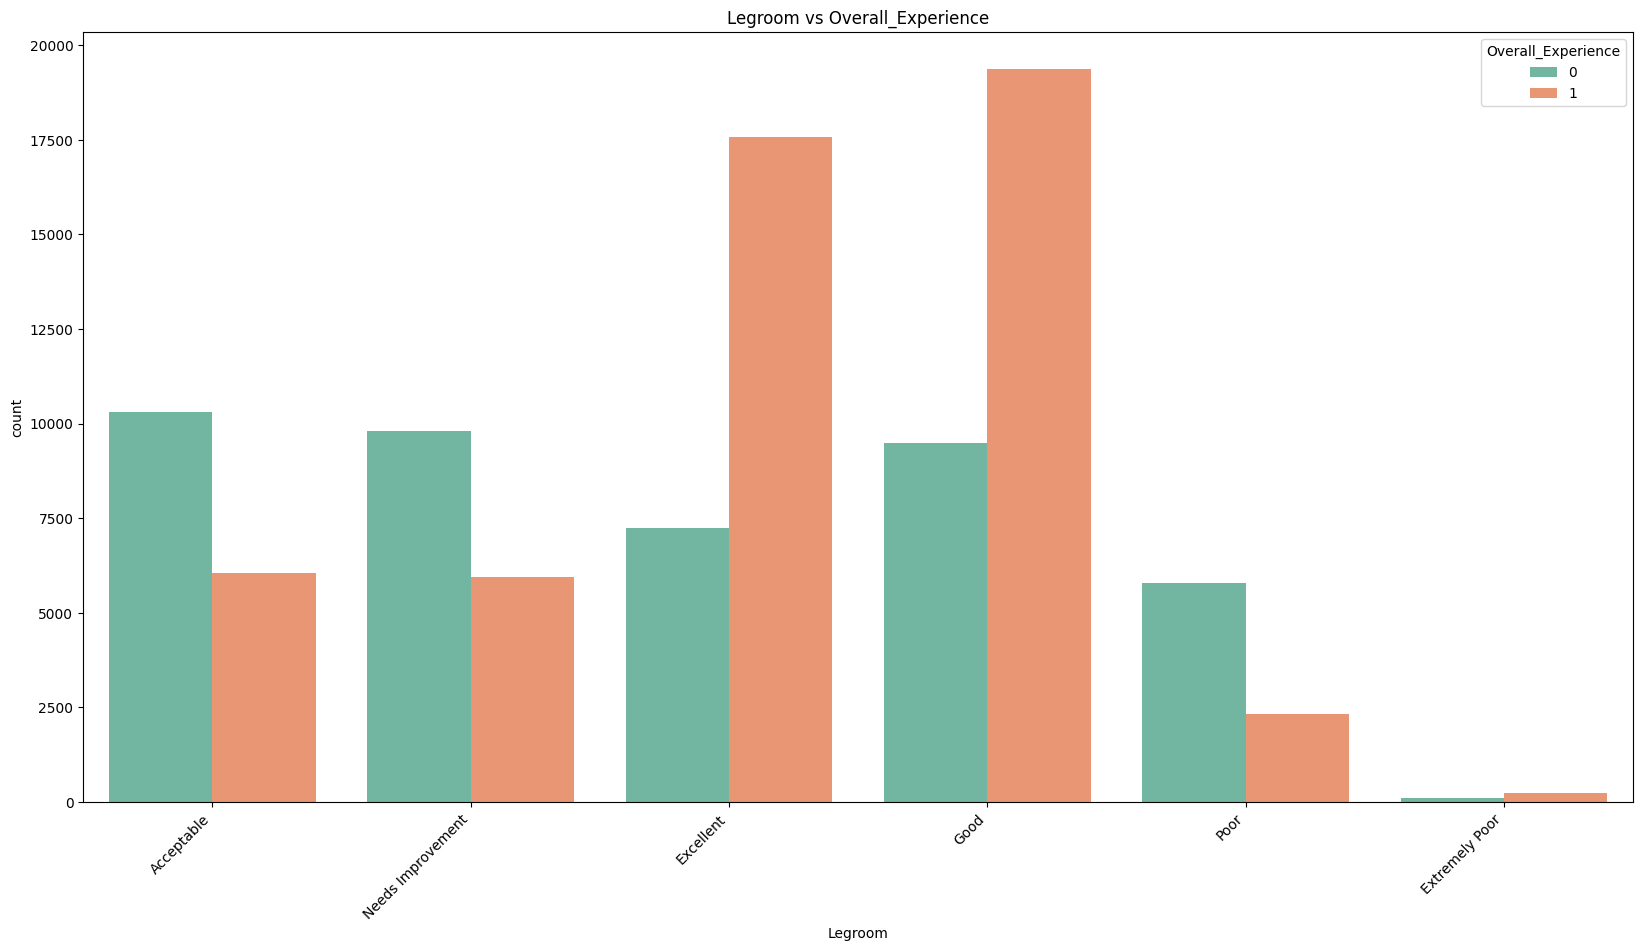

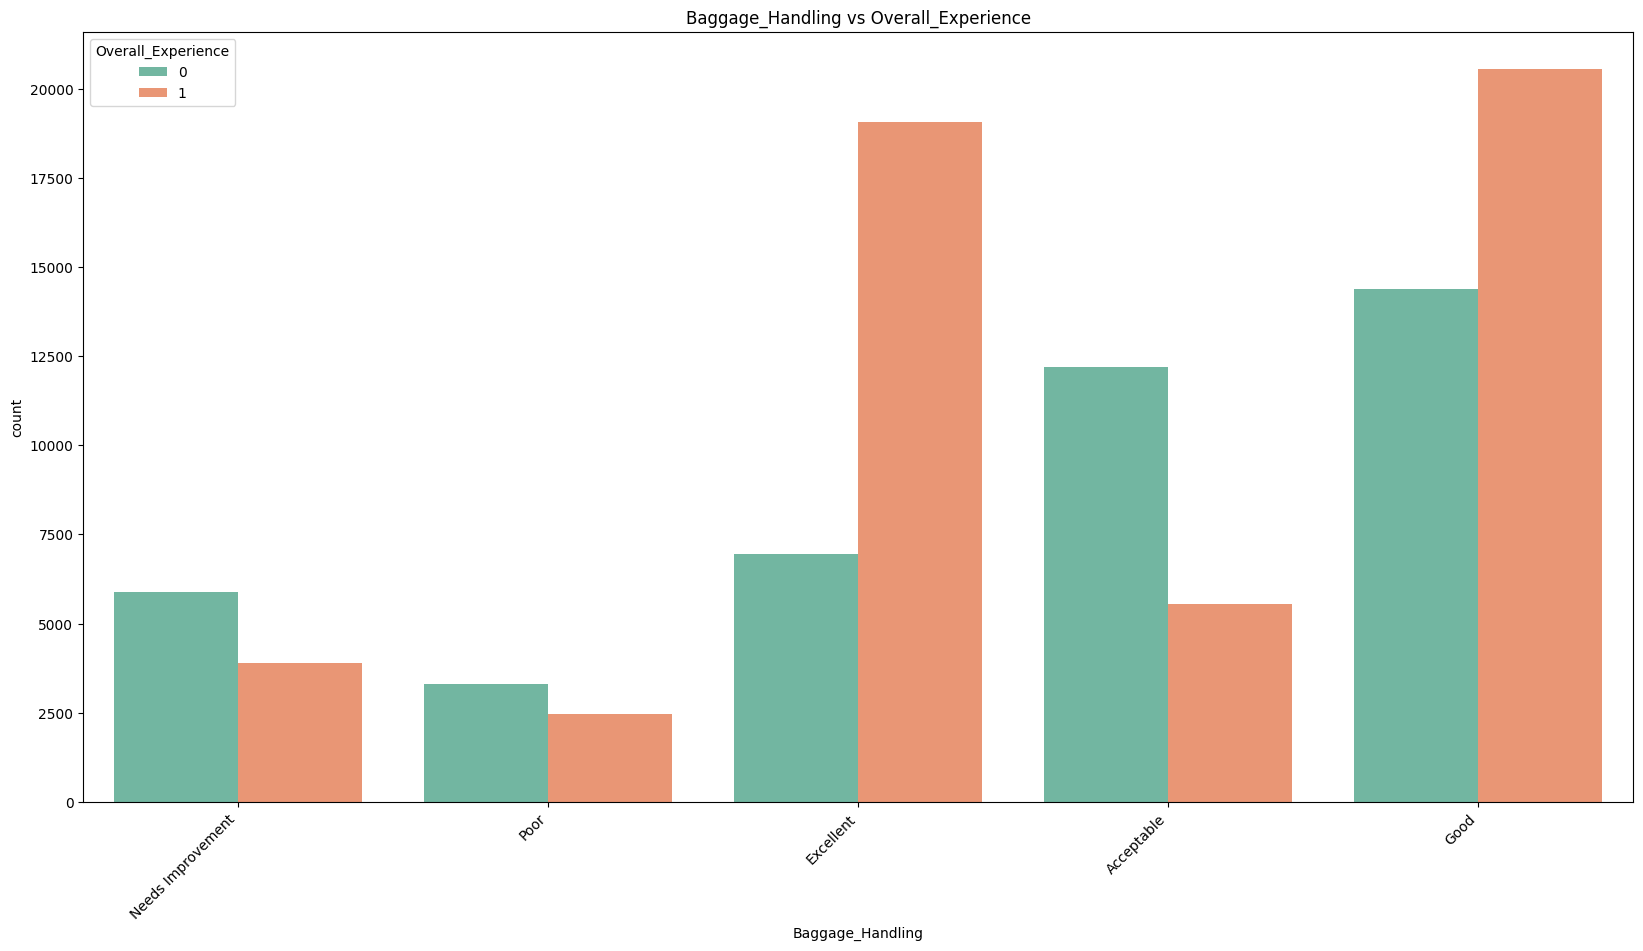

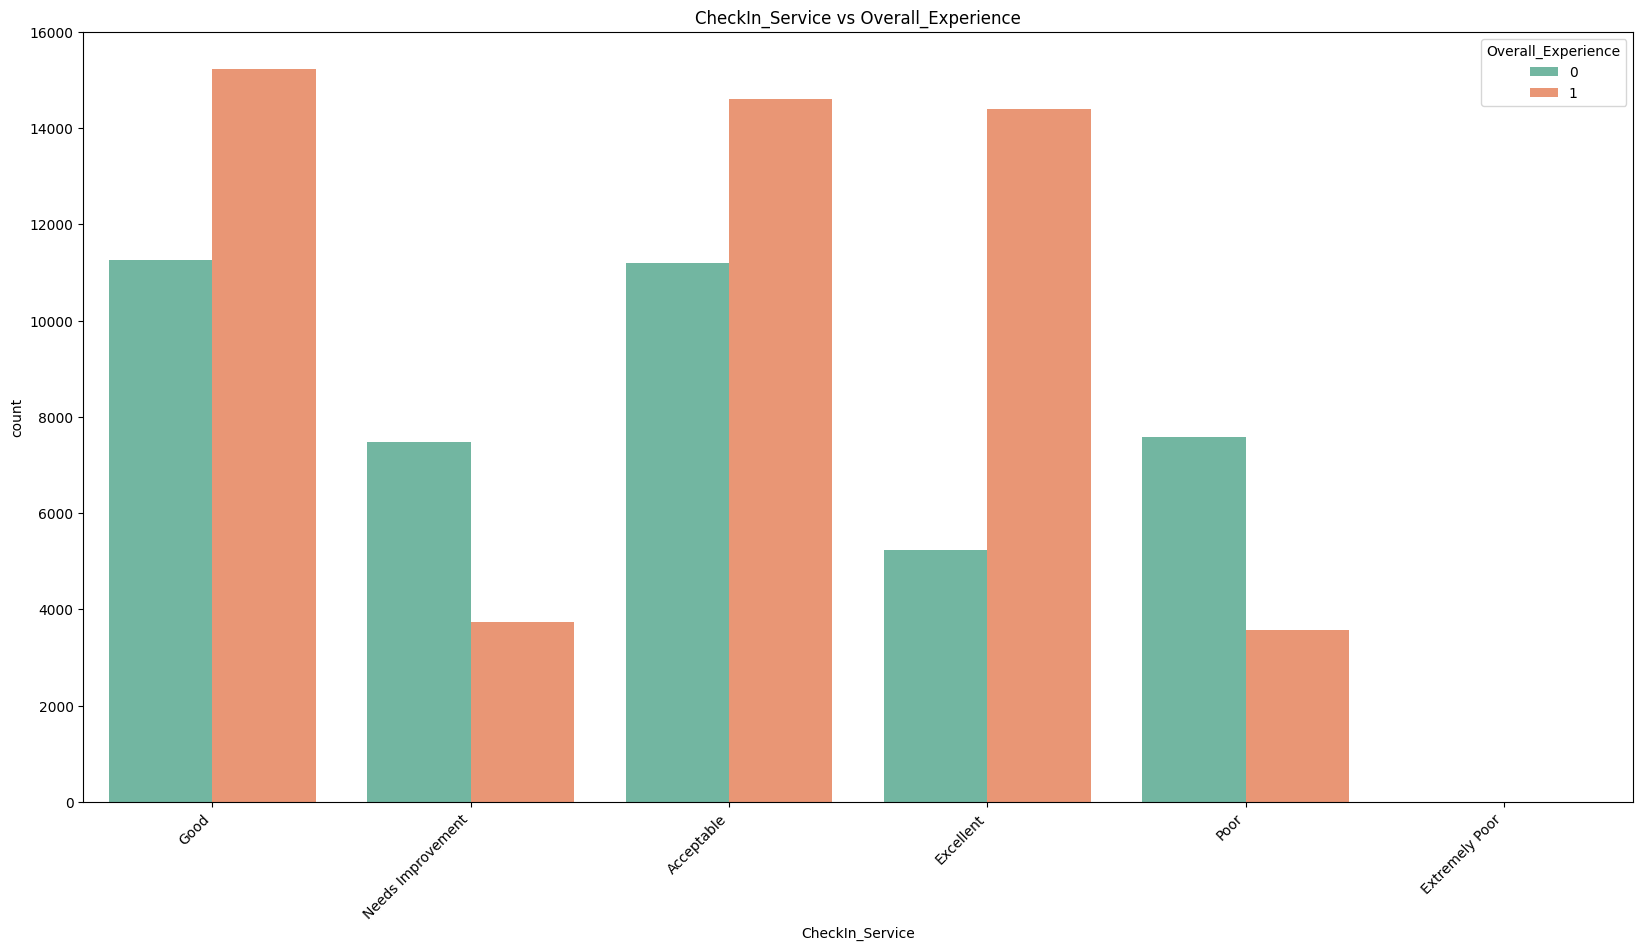

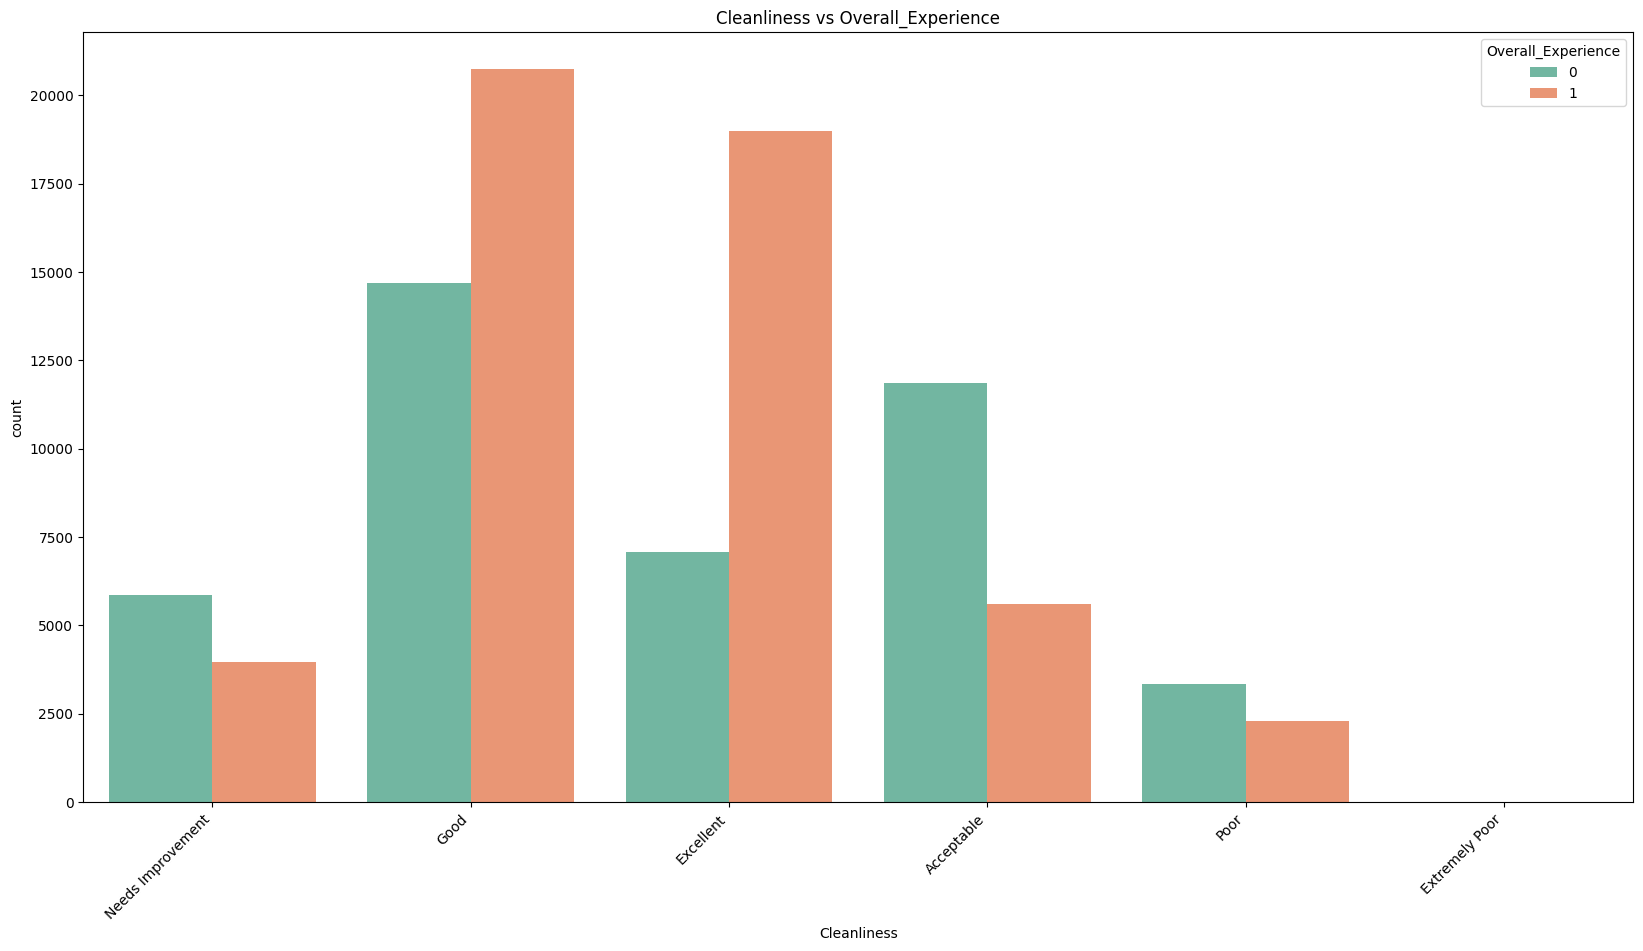

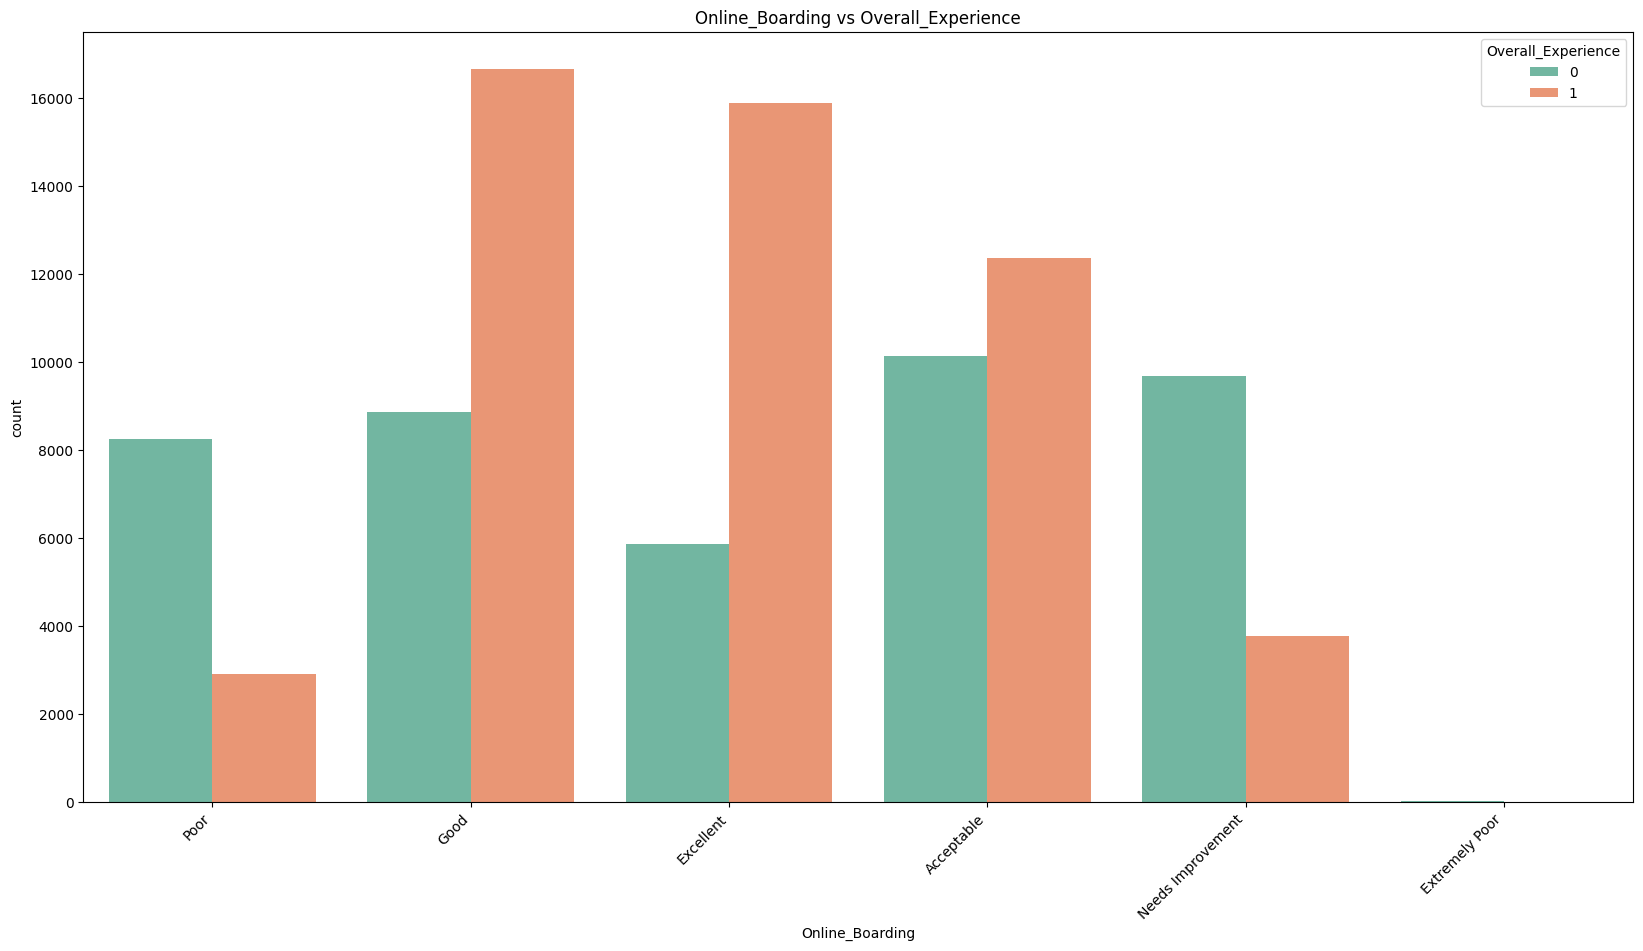

In [ ]:
def plot_categorical_bivariate(df, target):
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

    for column in categorical_columns:
        if column != target:
            plt.figure(figsize=(20, 10))
            sns.countplot(x=column, hue=target, data=df, palette='Set2')
            plt.title(f'{column} vs {target}')
            plt.xticks(rotation=45, ha='right')
            plt.show()

plot_categorical_bivariate(df_train_s, 'Overall_Experience')


# Data Cleaning and Preprocessing

In [ ]:
# Option B: Fill NaNs with the mean for numeric columns only
df_train_s_cleaned = df_train_s.fillna(df_train_s.select_dtypes(include=['float64', 'int64']).mean())


Handling Missing Data and Preparing for Correlation Analysis

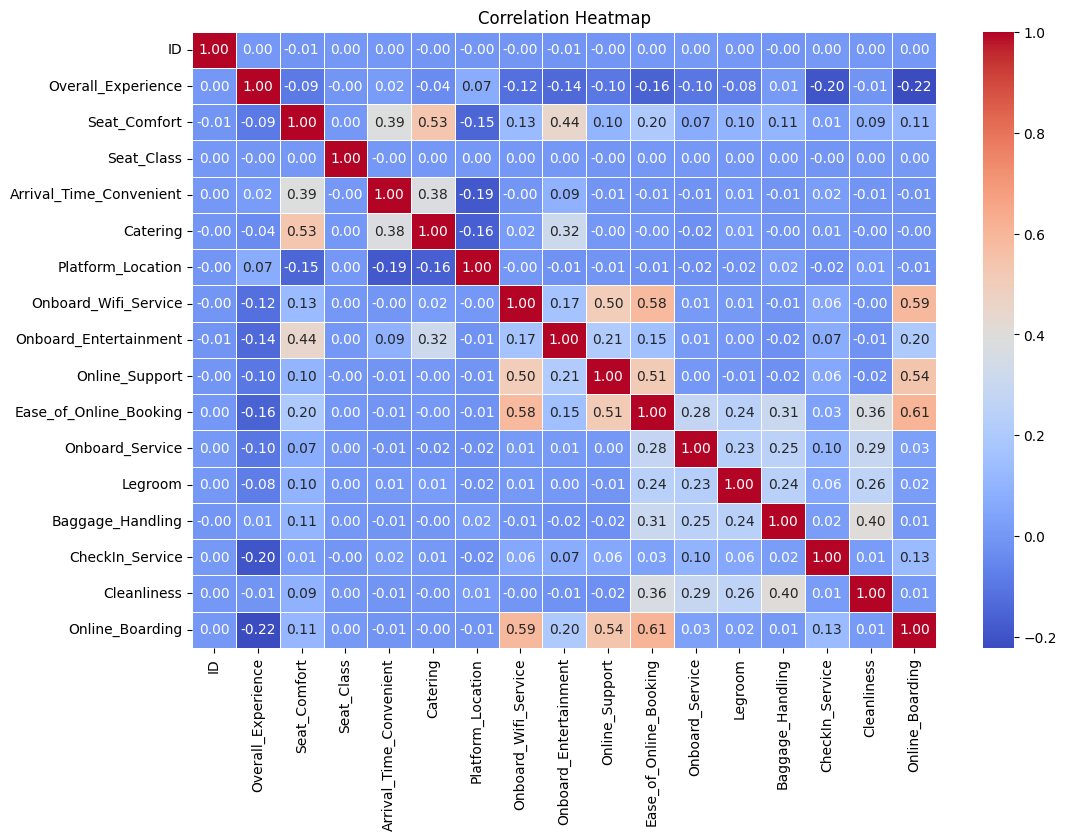

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame to avoid altering the original
df_encoded = df_train_s.copy()

# Encode categorical features as integers (or you could use one-hot encoding)
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Recompute the correlation matrix and plot the heatmap
def plot_correlation_heatmap(df):
    numerical_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

    plt.figure(figsize=(12, 8))
    corr = numerical_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df_encoded)


Overall_Experience: The target variable has some notable correlations, although not very strong. For example, there are weak correlations with Online_Boarding, Online_Support, and Ease_of_Online_Booking.

Seat_Comfort and Catering: These two features show a moderate positive correlation (0.57), indicating that people who are comfortable with their seating tend to have a better catering experience.

Onboard_Wifi_Service: This feature has a moderate positive correlation with Ease_of_Online_Booking (0.58), suggesting that people who find the WiFi service satisfactory are also likely to have a good online booking experience.

Ease_of_Online_Booking and Online_Support: These two features show a strong positive correlation (0.51), indicating that these services are often rated similarly by users.

---



Feature Engineering: Based on these correlations, you might consider creating interaction terms between some of the moderately correlated features, as they may improve your model's predictive power.
Dimensionality Reduction: If you find that some features are highly correlated with each other, you might want to consider dimensionality reduction techniques like PCA to reduce the feature space.

---



 Convert to Numerical Data

In [ ]:
# Print out all column names in the DataFrame to check for discrepancies
print(df_train_s.columns)


Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define the categorical columns and the numeric columns
ordinal_columns = ['Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Seat_Comfort', 'Catering']
nominal_columns = ['Seat_Class', 'Platform_Location', 'Onboard_Wifi_Service',
                   'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
                   'Onboard_Service', 'Legroom', 'Online_Boarding',
                   'Arrival_Time_Convenient']  # example nominal columns
numeric_columns = []  # example numeric columns if any

# Define the preprocessing steps for ordinal and nominal features
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('ordinal', ordinal_pipeline, ordinal_columns),
    ('nominal', nominal_pipeline, nominal_columns)
], remainder='passthrough')

# Apply the preprocessing
df_train_s_transformed = preprocessor.fit_transform(df_train_s)

# df_train_s_transformed should now be properly encoded


##  Treating the Outliers

In [ ]:
# Outlier Detection on the 25th and 75th percentile
# Select only numeric columns
numeric_columns = df_train_s.select_dtypes(include=np.number).columns
Q1 = df_train_s[numeric_columns].quantile(0.25)  # To find the 25th percentile for numeric columns
Q3 = df_train_s[numeric_columns].quantile(0.75)  # To find the 75th percentile for numeric columns

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

## Time-Based Features:

In [ ]:
# Create a new feature for total travel time
df_train_t['Total_Travel_Time'] = df_train_t['Arrival_Delay_in_Mins'] + df_train_t['Departure_Delay_in_Mins']

# You can create more features if needed based on the data understanding


## Aggregate Features:

In [ ]:
# Aggregated feature example: Mean delay
df_train_t['Mean_Delay'] = df_train_t[['Arrival_Delay_in_Mins', 'Departure_Delay_in_Mins']].mean(axis=1)

# Aggregate further if relevant columns are identified


## Treating df_train_s

In [ ]:
# Impute missing values for numeric columns with the mean
numeric_cols = df_train_s.select_dtypes(include=['float64', 'int64']).columns
df_train_s[numeric_cols] = df_train_s[numeric_cols].fillna(df_train_s[numeric_cols].mean())

# Impute missing values for categorical columns with the mode
categorical_cols = df_train_s.select_dtypes(include=['object']).columns
df_train_s[categorical_cols] = df_train_s[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
print(df_train_s.isnull().sum())

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64


In [ ]:
# Impute missing values for numeric columns with the mean
numeric_cols = df_train_t.select_dtypes(include=['float64', 'int64']).columns
df_train_t[numeric_cols] = df_train_t[numeric_cols].fillna(df_train_t[numeric_cols].mean())

# Impute missing values for categorical columns with the mode
categorical_cols = df_train_t.select_dtypes(include=['object']).columns
df_train_t[categorical_cols] = df_train_t[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
print(df_train_t.isnull().sum())

ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Total_Travel_Time          0
Mean_Delay                 0
dtype: int64


## Test Dataset

In [ ]:
# Impute missing values for numeric columns with the mean
numeric_cols_test_s = df_test_s.select_dtypes(include=['float64', 'int64']).columns
df_test_s[numeric_cols_test_s] = df_test_s[numeric_cols_test_s].fillna(df_test_s[numeric_cols_test_s].mean())

# Impute missing values for categorical columns with the mode
categorical_cols_test_s = df_test_s.select_dtypes(include=['object']).columns
df_test_s[categorical_cols_test_s] = df_test_s[categorical_cols_test_s].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
print(df_test_s.isnull().sum())

ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64


In [ ]:
# Impute missing values for numeric columns with the mean
numeric_cols_test_t = df_test_t.select_dtypes(include=['float64', 'int64']).columns
df_test_t[numeric_cols_test_t] = df_test_t[numeric_cols_test_t].fillna(df_test_t[numeric_cols_test_t].mean())

# Impute missing values for categorical columns with the mode
categorical_cols_test_t = df_test_t.select_dtypes(include=['object']).columns
df_test_t[categorical_cols_test_t] = df_test_t[categorical_cols_test_t].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
print(df_test_t.isnull().sum())


ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64


# One Hot Encoding Setup

## Training Datasets

In [ ]:
# Identify categorical columns for df_train_s
categorical_cols_train_s = df_train_s.select_dtypes(include=['object']).columns.tolist()


# Perform one-hot encoding on categorical columns for df_train_s
df_train_s_encoded = pd.get_dummies(df_train_s, columns=categorical_cols_train_s)

# Verify the encoding
print(df_train_s_encoded.head())

         ID  Overall_Experience  Seat_Comfort_Acceptable  \
0  98800001                   0                    False   
1  98800002                   0                    False   
2  98800003                   1                    False   
3  98800004                   0                     True   
4  98800005                   1                     True   

   Seat_Comfort_Excellent  Seat_Comfort_Extremely Poor  Seat_Comfort_Good  \
0                   False                        False              False   
1                   False                        False              False   
2                   False                        False              False   
3                   False                        False              False   
4                   False                        False              False   

   Seat_Comfort_Needs Improvement  Seat_Comfort_Poor  Seat_Class_Green Car  \
0                            True              False                  True   
1                   

In [ ]:
# Define the categorical columns in df_train_t
categorical_cols_train_t = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']

# Perform one-hot encoding on categorical columns for df_train_t
df_train_t_encoded = pd.get_dummies(df_train_t, columns=categorical_cols_train_t)

# Verify the encoding
print(df_train_t_encoded.head())

         ID   Age  Travel_Distance  Departure_Delay_in_Mins  \
0  98800001  52.0              272                      0.0   
1  98800002  48.0             2200                      9.0   
2  98800003  43.0             1061                     77.0   
3  98800004  44.0              780                     13.0   
4  98800005  50.0             1981                      0.0   

   Arrival_Delay_in_Mins  Total_Travel_Time  Mean_Delay  Gender_Female  \
0                    5.0                5.0         2.5           True   
1                    0.0                9.0         4.5          False   
2                  119.0              196.0        98.0           True   
3                   18.0               31.0        15.5           True   
4                    0.0                0.0         0.0           True   

   Gender_Male  Customer_Type_Disloyal Customer  Customer_Type_Loyal Customer  \
0        False                            False                          True   
1         True

## Test datasets

In [ ]:
# Perform one-hot encoding on categorical columns for df_test_s
df_test_s_encoded = pd.get_dummies(df_test_s, columns=categorical_cols_test_s)

# Verify the encoding
print(df_test_s_encoded.head())

         ID  Seat_Comfort_Acceptable  Seat_Comfort_Excellent  \
0  99900001                     True                   False   
1  99900002                    False                   False   
2  99900003                    False                    True   
3  99900004                     True                   False   
4  99900005                    False                    True   

   Seat_Comfort_Extremely Poor  Seat_Comfort_Good  \
0                        False              False   
1                         True              False   
2                        False              False   
3                        False              False   
4                        False              False   

   Seat_Comfort_Needs Improvement  Seat_Comfort_Poor  Seat_Class_Green Car  \
0                           False              False                  True   
1                           False              False                 False   
2                           False              False          

In [ ]:
# Perform one-hot encoding on categorical columns for df_test_t
df_test_t_encoded = pd.get_dummies(df_test_t, columns=categorical_cols_test_t)

# Verify the encoding
print(df_test_t_encoded.head())

         ID   Age  Travel_Distance  Departure_Delay_in_Mins  \
0  99900001  36.0              532                      0.0   
1  99900002  21.0             1425                      9.0   
2  99900003  60.0             2832                      0.0   
3  99900004  29.0             1352                      0.0   
4  99900005  18.0             1610                     17.0   

   Arrival_Delay_in_Mins  Gender_Female  Gender_Male  \
0                    0.0           True        False   
1                   28.0           True        False   
2                    0.0          False         True   
3                    0.0           True        False   
4                    0.0          False         True   

   Customer_Type_Disloyal Customer  Customer_Type_Loyal Customer  \
0                            False                          True   
1                             True                         False   
2                            False                          True   
3           

## Interaction Features:

In [ ]:
# Interaction between travel class and type of travel
df_train_t['Travel_Class_Type_Interaction'] = df_train_t['Travel_Class'] + "_" + df_train_t['Type_Travel']

# Interaction between customer type and delay
df_train_t['Customer_Type_Delay_Interaction'] = df_train_t['Customer_Type'] + "_" + (df_train_t['Total_Travel_Time'] > df_train_t['Total_Travel_Time'].mean()).astype(str)

# Interaction between gender and travel class
df_train_t['Gender_Travel_Class_Interaction'] = df_train_t['Gender'] + "_" + df_train_t['Travel_Class']

# More interactions can be added as needed based on data understanding


## Categorical Feature Encoding:

In [ ]:
# Check if there are any new categorical interaction features that need encoding
categorical_interaction_cols = df_train_s.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the newly created interaction features
df_train_s_encoded = pd.get_dummies(df_train_s, columns=categorical_interaction_cols, drop_first=True)

# Apply the same process for df_train_t (if there were interaction features created in df_train_t)
categorical_interaction_cols_t = df_train_t.select_dtypes(include=['object']).columns
df_train_t_encoded = pd.get_dummies(df_train_t, columns=categorical_interaction_cols_t, drop_first=True)

# Verify that the encoding was successful
print("First few rows of the encoded df_train_s dataset:")
print(df_train_s_encoded.head())

print("\nFirst few rows of the encoded df_train_t dataset:")
print(df_train_t_encoded.head())


First few rows of the encoded df_train_s dataset:
         ID  Overall_Experience  Seat_Comfort_Excellent  \
0  98800001                   0                   False   
1  98800002                   0                   False   
2  98800003                   1                   False   
3  98800004                   0                   False   
4  98800005                   1                   False   

   Seat_Comfort_Extremely Poor  Seat_Comfort_Good  \
0                        False              False   
1                        False              False   
2                        False              False   
3                        False              False   
4                        False              False   

   Seat_Comfort_Needs Improvement  Seat_Comfort_Poor  Seat_Class_Ordinary  \
0                            True              False                False   
1                           False               True                 True   
2                            True            

# Drop the Id column

In [ ]:
# Drop the 'ID' column from df_train_s
X_train_s_features = df_train_s.drop(columns=['ID'], inplace=True)


In [ ]:
# Drop the 'ID' column from df_train_s_encoded if it's present
if 'ID' in df_train_s_encoded.columns:
    df_train_s_encoded = df_train_s_encoded.drop(columns=['ID'], inplace=False)

# Similarly, drop the 'ID' column from df_test_s if it's there before encoding
if 'ID' in df_test_s.columns:
    df_test_s_encoded = df_test_s.drop(columns=['ID'], inplace=False)


# Impute the NaN Value im df_test_s

In [ ]:
# Or, impute with the mode
df_test_s['CheckIn_Service'].fillna(df_test_s['CheckIn_Service'].mode()[0], inplace=True)


# Impute with Mode for Categorical Columns

In [ ]:
categorical_columns = df_test_s.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df_test_s[col].fillna(df_test_s[col].mode()[0], inplace=True)


# Verify The Changes

In [ ]:
df_test_s.loc[df_test_s['ID'] == 99900005]


,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,Good,Acceptable,Excellent,Excellent,Excellent,Excellent


# Splitting the Dataset

## df_train_s Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Define your feature variables (X) and target variable (y) for df_train_s
X_s = df_train_s.drop(columns=['Overall_Experience'])
y_s = df_train_s['Overall_Experience']

# Split the data into training and validation sets
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_s, y_s, test_size=0.30, random_state=64)

# Check the shapes of the splits to ensure everything is correct
print("Training features shape (S dataset):", X_train_s.shape)
print("Validation features shape (S dataset):", X_val_s.shape)
print("Training target shape (S dataset):", y_train_s.shape)
print("Validation target shape (S dataset):", y_val_s.shape)


Training features shape (S dataset): (66065, 15)
Validation features shape (S dataset): (28314, 15)
Training target shape (S dataset): (66065,)
Validation target shape (S dataset): (28314,)


# Model Selection

# Training XGBoost on df_train_s

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize the label encoder for y_train_s
label_encoder_s = LabelEncoder()

# Fit and transform the training target variable
y_train_s_encoded = label_encoder_s.fit_transform(y_train_s)

# Transform the validation target variable
y_val_s_encoded = label_encoder_s.transform(y_val_s)

# Perform one-hot encoding on the training and validation features
X_train_s_encoded = pd.get_dummies(X_train_s)
X_val_s_encoded = pd.get_dummies(X_val_s)

# Align the train and validation sets to ensure they have the same columns
X_train_s_encoded, X_val_s_encoded = X_train_s_encoded.align(X_val_s_encoded, join='left', axis=1, fill_value=0)

# Instantiate the XGBoost model with the best parameters from Bayesian Optimization
best_params = {
    'colsample_bytree': 0.63,
    'learning_rate': 0.12,
    'max_depth': 10,
    'n_estimators': 209,
    'subsample': 0.96,
    'eval_metric': 'mlogloss'
}

model_s = xgb.XGBClassifier(**best_params)

# Apply cross-validation for a more robust evaluation
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=32)
cv_scores = cross_val_score(model_s, X_train_s_encoded, y_train_s_encoded, cv=cv, scoring='accuracy')

# Train the model with the encoded training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the validation set
y_pred_s_encoded = model_s.predict(X_val_s_encoded)

# Decode the predictions back to the original labels
y_pred_s = label_encoder_s.inverse_transform(y_pred_s_encoded)

# Evaluate the model
accuracy_s = accuracy_score(y_val_s_encoded, y_pred_s_encoded)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Accuracy for df_train_s: {accuracy_s:.4f}")

Cross-validation scores: [0.94060485 0.9443284  0.9408773  0.94369267 0.94196712 0.94386921]
Mean CV accuracy: 0.9426
Accuracy for df_train_s: 0.9430


# XGBoost with GridSearchCV df_train_s

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Initialize the XGBoost model
model_s = xgb.XGBClassifier(eval_metric='mlogloss', n_jobs=-1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [6, 7, 8],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Implement GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model_s, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_s_encoded, y_train_s_encoded)

# Get the best model and evaluate it
best_model = grid_search.best_estimator_
y_pred_s_encoded = best_model.predict(X_val_s_encoded)

# Decode the predictions back to the original labels
y_pred_s = label_encoder_s.inverse_transform(y_pred_s_encoded)

# Evaluate the model
accuracy_s = accuracy_score(y_val_s_encoded, y_pred_s_encoded)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy for df_train_s with GridSearchCV: {accuracy_s:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'subsample': 1.0}
Accuracy for df_train_s with GridSearchCV: 0.9429


# XGBoost is My Higest Score.

### Working this Model to turn in:

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Initialize the XGBoost model with the best parameters found earlier
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 8,
    'n_estimators': 300,
    'subsample': 1.0,
    'eval_metric': 'mlogloss'
}

model_s = xgb.XGBClassifier(**best_params)

# Fit the model on the training data (if not already fitted)
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")



Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test_predictions.csv


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_val and y_val_pred_s_encoded are available
accuracy_val = accuracy_score(y_val_s_encoded, y_pred_s_encoded)
print(f"Validation Accuracy: {accuracy_val:.4f}")


Validation Accuracy: 0.9423


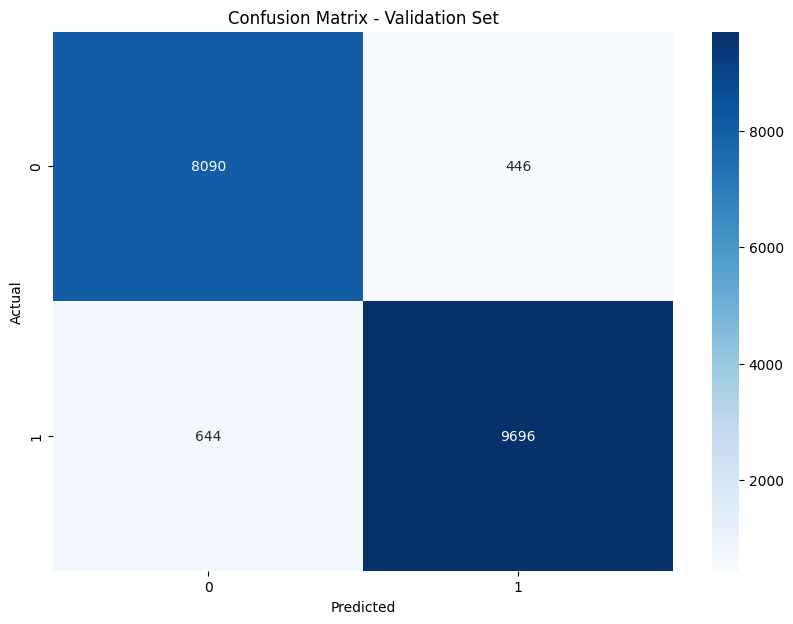

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_s_encoded, y_pred_s_encoded)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Set')
plt.show()


# Adding Class Weights to the XGBoost Model

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with the best parameters found earlier and class weights
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 8,
    'n_estimators': 300,
    'subsample': 1.0,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight  # Apply class weights
}

model_s = xgb.XGBClassifier(**best_params)

# Fit the model on the training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test1_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test1_predictions.csv


Validation Accuracy: 0.9435


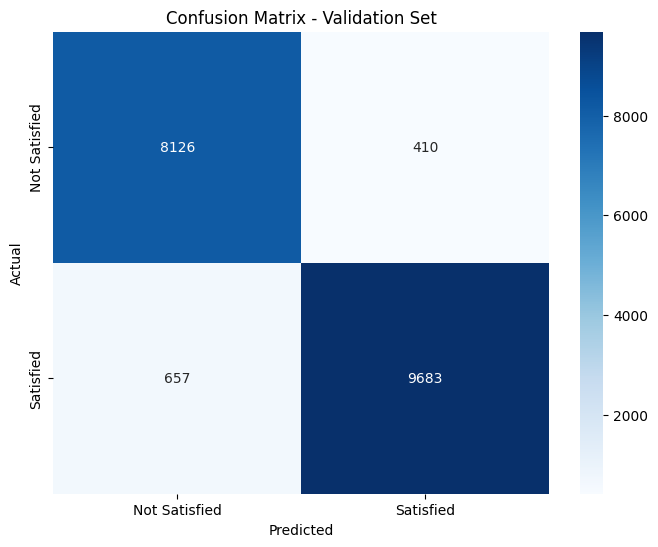

In [ ]:
# Make predictions on the validation set
y_val_pred_random = model_s.predict(X_val_s_encoded)

# Calculate the accuracy
accuracy = accuracy_score(y_val_s_encoded, y_val_pred_random)
print(f"Validation Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_val_s_encoded, y_val_pred_random)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Validation Set')
plt.show()


# Adding Class Weights and Regualrization

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Step 3: Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Step 4: Initialize the XGBoost model with the best parameters found earlier, class weights, and regularization
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 8,
    'n_estimators': 300,
    'subsample': 1.0,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,  # Apply class weights
    'reg_alpha': 0.1,  # L1 regularization term on weights (increase if overfitting)
    'reg_lambda': 0.1  # L2 regularization term on weights (increase if overfitting)
}

model_s = xgb.XGBClassifier(**best_params)

# Step 5: Fit the model on the training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Step 6: Evaluate the model on the validation set
y_val_pred_s = model_s.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred_s)
print(f"Validation Accuracy after Class Weights and Regularization: {accuracy_val:.4f}")

# Step 7: Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Step 8: Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test2_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")



Validation Accuracy after Class Weights and Regularization: 0.9436
Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test2_predictions.csv


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with fine-tuned parameters and L2 regularization
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.05,  # Lower learning rate
    'max_depth': 8,
    'n_estimators': 500,  # Increased boosting rounds
    'subsample': 1.0,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,  # Apply class weights
    'reg_lambda': 10  # Add L2 regularization
}

model_s = xgb.XGBClassifier(**best_params)

# Fit the model on the training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test3_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate on the validation set
y_val_pred = model_s.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred)
print(f"Validation Accuracy after further fine-tuning: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test3_predictions.csv
Validation Accuracy after further fine-tuning: 0.9409


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with L1 and L2 regularization and class weights
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 8,
    'n_estimators': 800,
    'subsample': 1.0,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,  # Apply class weights
    'reg_alpha': 0.1,  # L1 regularization
    'reg_lambda': 1.0  # L2 regularization
}

model_s = xgb.XGBClassifier(**best_params)

# Fit the model on the training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test4_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate the model on the validation set (optional)
y_val_pred = model_s.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred)
print(f"Validation Accuracy after L1 and L2 Regularization: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test4_predictions.csv
Validation Accuracy after L1 and L2 Regularization: 0.9435


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with a lower learning rate and adjusted parameters
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.05,  # Lowered learning rate
    'max_depth': 8,
    'n_estimators': 800,  # Increased boosting rounds
    'subsample': 1.0,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,  # Apply class weights
    'reg_alpha': 0.01,  # L1 regularization
    'reg_lambda': 1.0   # L2 regularization
}

model_s = xgb.XGBClassifier(**best_params)

# Fit the model on the training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test5_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate the model on the validation set
y_val_pred_s_encoded = model_s.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred_s_encoded)
print(f"Validation Accuracy after adjusting learning rate: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test5_predictions.csv
Validation Accuracy after adjusting learning rate: 0.9432




---



---
# Winning Model to trun in based on the Validation score 94.58%


---



---




In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with L1 and L2 regularization and class weights
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 8,
    'n_estimators': 800,
    'subsample': 1.0,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,  # Apply class weights
    'reg_alpha': 0.1,  # L1 regularization
    'reg_lambda': 1.0  # L2 regularization
}

model_s = xgb.XGBClassifier(**best_params)

# Fit the model on the training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test6_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate the model on the validation set (optional)
y_val_pred = model_s.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred)
print(f"Validation Accuracy after L1 and L2 Regularization: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test6_predictions.csv
Validation Accuracy after L1 and L2 Regularization: 0.9428


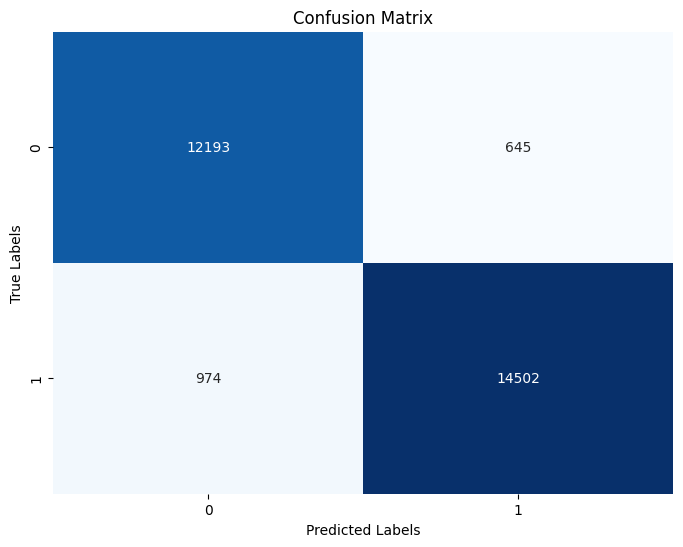

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12838
           1       0.96      0.94      0.95     15476

    accuracy                           0.94     28314
   macro avg       0.94      0.94      0.94     28314
weighted avg       0.94      0.94      0.94     28314



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val_s_encoded, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(y_val_s_encoded, y_val_pred)
print(report)




---



---

# END

## final_submission2.csv is the csv to trun in.

In [ ]:
import pandas as pd

# Load the final submission file
submission = pd.read_csv('/content/drive/MyDrive/lab_mount/final_submission.csv')

# Adjust the ID column to start at 99900001
submission['ID'] = range(99900001, 99900001 + len(submission))

# Save the updated submission file
submission.to_csv('/content/drive/MyDrive/lab_mount/final_submission2_corrected.csv', index=False)

print("Final submission file saved with IDs starting at 99900001.")


Final submission file saved with IDs starting at 99900001.


# Additional Hyperparameters to the same model to increase scoring. Goal is 96.77

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with L1 and L2 regularization and class weights
best_params = {
    'colsample_bytree': 0.7,  # Further increase for maximum feature diversity
    'learning_rate': 0.8,  # Lower the learning rate to make learning even more gradual and precise
    'max_depth': 7,  # Increase depth to capture the most complex patterns possible
    'n_estimators': 10000,  # Further increase the number of trees for maximum boosting rounds
    'subsample': 0.95,  # Increase subsample to use almost the entire dataset, improving generalization
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,  # Keep class weights to balance the classes
    'reg_alpha': 0.05,  # Slightly lower L1 regularization to allow more non-zero weights, but still penalize complexity
    'reg_lambda': 1.0,  # Reduce L2 regularization to provide more flexibility in model weights
    'min_child_weight': 0.5,  # Decrease further to allow even more splits, capturing more patterns
    'gamma': 0.01,  # Reduce gamma to allow for more splitting where it can help reduce loss
    'colsample_bylevel': 1.00,  # Increase feature sampling at each level for more diversity
    'colsample_bynode': 1.00,  # Increase feature sampling at each node to reduce overfitting
}


model_s = xgb.XGBClassifier(**best_params)

# Fit the model on the training data
model_s.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = model_s.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_test7_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate the model on the validation set (optional)
y_val_pred = model_s.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred)
print(f"Validation Accuracy after L1 and L2 Regularization: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_test7_predictions.csv
Validation Accuracy after L1 and L2 Regularization: 0.9310


# Hyperparameters set. Moving to Stack this model.

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with L1 and L2 regularization and class weights
best_params = {
    'colsample_bytree': 0.20,  # Further increase for maximum feature diversity
    'learning_rate': 0.07,  # Lower the learning rate to make learning even more gradual and precise
    'max_depth': 11,  # Increase depth to capture the most complex patterns possible
    'n_estimators': 10000,  # Further increase the number of trees for maximum boosting rounds
    'subsample': 0.98,  # Increase subsample to use almost the entire dataset, improving generalization
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,  # Keep class weights to balance the classes
    'reg_alpha': 0.05,  # Slightly lower L1 regularization to allow more non-zero weights, but still penalize complexity
    'reg_lambda': 1.0,  # Reduce L2 regularization to provide more flexibility in model weights
    'min_child_weight': 0.5,  # Decrease further to allow even more splits, capturing more patterns
    'gamma': 0.15,  # Reduce gamma to allow for more splitting where it can help reduce loss
    'colsample_bylevel': 1.00,  # Increase feature sampling at each level for more diversity
    'colsample_bynode': 1.00,  # Increase feature sampling at each node to reduce overfitting
}

# Base models for stacking
xgb_model = xgb.XGBClassifier(**best_params)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Stacking ensemble model
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Fit the stacked model on the training data
stacked_model.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = stacked_model.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_stacked_test_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate the stacked model on the validation set
y_val_pred = stacked_model.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred)
print(f"Validation Accuracy after Stacking: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_stacked_test_predictions.csv
Validation Accuracy after Stacking: 0.9438


To add LightGBM into your stacking ensemble, you'll need to include it alongside XGBoost and a Random Forest, then use a stacking classifier with Logistic Regression as the final estimator. Below is the modified code that incorporates LightGBM:

In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize the XGBoost model with L1 and L2 regularization and class weights
xgb_params = {
    'colsample_bytree': 0.9,
    'learning_rate': 0.011,
    'max_depth': 11,
    'n_estimators': 1000,
    'subsample': 0.95,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,
    'reg_alpha': 0.05,
    'reg_lambda': 1.0,
    'min_child_weight': 0.5,
    'gamma': 0.15,
    'colsample_bylevel': 0.92,
    'colsample_bynode': 0.92,
}

# Initialize LightGBM model
lgb_params = {
    'learning_rate': 0.011,
    'max_depth': 11,
    'n_estimators': 1000,
    'subsample': 0.95,
    'colsample_bytree': 0.9,
    'scale_pos_weight': scale_pos_weight,
    'reg_alpha': 0.05,
    'reg_lambda': 1.0,
    'min_child_weight': 0.5,
}

xgb_model = xgb.XGBClassifier(**xgb_params)
lgb_model = lgb.LGBMClassifier(**lgb_params)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Stacking ensemble model
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('rf', rf_model)
    ],
    final_estimator=LogisticRegression(max_iter=100000),
    cv=10
)

# Fit the stacked model on the training data
stacked_model.fit(X_train_s_encoded, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = stacked_model.predict(X_test_s_encoded)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_lgb_rf_stacked_test_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate the model on the validation set
y_val_pred = stacked_model.predict(X_val_s_encoded)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred)
print(f"Validation Accuracy after Stacking with LightGBM: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_lgb_rf_stacked_test_predictions.csv
Validation Accuracy after Stacking with LightGBM: 0.9438


To maximize the chances of scoring 95+, here's a well-rounded approach:

Strategy Overview:
Model Ensemble: Use a powerful ensemble of XGBoost and LightGBM, as these models generally complement each other well.
Feature Engineering: Add interaction terms or polynomial features to capture more complex relationships.
Regularization Tuning: Fine-tune the regularization parameters to prevent overfitting while capturing important patterns.
Cross-Validation: Increase cross-validation folds to ensure robust performance.
Meta-Model: Use a more sophisticated meta-model in stacking, such as Gradient Boosting Machine (GBM) or even another instance of XGBoost.

# Final Model Implementation:

In [ ]:
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import joblib

# Set joblib to use the threading backend
joblib.parallel_backend('threading')

# Load the test datasets
df_test_s = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Surveydata_test_(2).csv')
df_test_t = pd.read_csv('/content/drive/MyDrive/lab_mount/Test_Dataset_Files/Traveldata_test_(2).csv')

# Assuming X_train_s_encoded is the preprocessed training set
# Apply the same preprocessing steps to the test data

# Step 1: One-Hot Encoding for the test data
X_test_s_encoded = pd.get_dummies(df_test_s)

# Step 2: Align the Test Set with Training Set Columns
X_test_s_encoded = X_test_s_encoded.reindex(columns=X_train_s_encoded.columns, fill_value=0)

# Step 3: Feature Engineering - Adding Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_s_encoded_poly = poly.fit_transform(X_train_s_encoded)
X_val_s_encoded_poly = poly.transform(X_val_s_encoded)
X_test_s_encoded_poly = poly.transform(X_test_s_encoded)

# Calculate class weights using np.bincount
class_counts = np.bincount(y_train_s_encoded)
scale_pos_weight = class_counts[0] / class_counts[1]  # Adjust based on your classes

# Initialize XGBoost and LightGBM models
xgb_params = {
    'colsample_bytree': 0.9,
    'learning_rate': 0.03,
    'max_depth': 10,
    'n_estimators': 800,
    'subsample': 0.95,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': scale_pos_weight,
    'reg_alpha': 0.1,
    'reg_lambda': 1.2,
    'min_child_weight': 1,
    'gamma': 0.15,
    'colsample_bylevel': 0.9,
    'colsample_bynode': 0.9,
}
lgb_params = {
    'learning_rate': 0.03,
    'max_depth': 10,
    'n_estimators': 800,
    'subsample': 0.95,
    'colsample_bytree': 0.9,
    'scale_pos_weight': scale_pos_weight,
    'reg_alpha': 0.1,
    'reg_lambda': 1.2,
    'min_child_weight': 1,
}

xgb_model = xgb.XGBClassifier(**xgb_params)
lgb_model = lgb.LGBMClassifier(**lgb_params)
gbm_model = GradientBoostingClassifier(n_estimators=400, max_depth=7, random_state=64)

# Stacking ensemble model with GBM as the final estimator
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model)
    ],
    final_estimator=gbm_model,
    cv=5
)

# Fit the stacked model on the training data with polynomial features
stacked_model.fit(X_train_s_encoded_poly, y_train_s_encoded)

# Make predictions on the test set
y_test_pred_s_encoded = stacked_model.predict(X_test_s_encoded_poly)

# Save the test set predictions to a CSV file
output_path = "/content/drive/MyDrive/lab_mount/xgb_lgb_gbm_stacked_test_predictions.csv"
pd.DataFrame({'Predictions': y_test_pred_s_encoded}).to_csv(output_path, index=False)

print(f"Test predictions saved to {output_path}")

# Evaluate the model on the validation set
y_val_pred = stacked_model.predict(X_val_s_encoded_poly)
accuracy_val = accuracy_score(y_val_s_encoded, y_val_pred)
print(f"Validation Accuracy after Stacking with LightGBM and GBM: {accuracy_val:.4f}")


Test predictions saved to /content/drive/MyDrive/lab_mount/xgb_lgb_gbm_stacked_test_predictions.csv
Validation Accuracy after Stacking with LightGBM and GBM: 0.9353


In [ ]:
import pandas as pd

# Load the predictions file
predictions_df = pd.read_csv("/content/drive/MyDrive/lab_mount/xgb_lgb_gbm_stacked_test_predictions.csv")

# Rename the column that contains the predictions to 'Overall_Experience'
if 'Predictions' in predictions_df.columns:
    predictions_df.rename(columns={'Predictions': 'Overall_Experience'}, inplace=True)
else:
    predictions_df.columns = ['Overall_Experience']

# Add the ID column starting from 99900001
predictions_df['ID'] = range(99900001, 99900001 + len(predictions_df))

# Reorder the columns so that ID comes first
predictions_df = predictions_df[['ID', 'Overall_Experience']]

# Save the final submission file
final_output_path = "/content/drive/MyDrive/lab_mount/final_submission_with_id.csv"
predictions_df.to_csv(final_output_path, index=False)

print(f"Final submission file saved with corrected headers and ID starting from 99900001 at {final_output_path}")


Final submission file saved with corrected headers and ID starting from 99900001 at /content/drive/MyDrive/lab_mount/final_submission_with_id.csv
